<a href="https://www.kaggle.com/code/oladipupoolawoye/advancedregressionmodelling?scriptVersionId=140676337" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction with Machine Learning Algorithms

![](https://i.imgur.com/3sw1fY9.jpg)

In this Real Estate Project, we are going to predict the price of a house using information like its location, area, no. of rooms etc. The data used was the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Importing Necessary Libraries and Loading the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import tensorflow as tf

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Data Collection and Preprocessing

In [3]:
# Read the data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# Read the test data
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [5]:
submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

## Data size and structure

In [6]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
print(f"The training Data has {train.shape[0]} data entry(rows) and {train.shape[1]} features(columns)")

The training Data has 1460 data entry(rows) and 81 features(columns)


In [9]:
print(f"The test Data has {test.shape[0]} data entry(rows) and {test.shape[1]} features(columns)")

The test Data has 1459 data entry(rows) and 80 features(columns)


> We see that test has only 80 columns, while train has 81. This is due to, of course, the fact that the test data do not include the final sale price information!

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Understanding the data

### Descriptive Statistics

**Before delving into our analysis, it's essential to start with an initial exploration of our dataset. This initial examination helps us grasp the dataset's composition, including the total number of entries, the data types associated with each feature, and an initial glimpse into any potential presence of missing values.**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# Retreive categorical features
categorical_cols = train.select_dtypes(include=['object']).columns
num_categorical = len(categorical_cols)
print("Number of categorical variables: ", num_categorical)

Number of categorical variables:  43


In [13]:
# Retreive numeric features
numerical_cols = train.select_dtypes(exclude=['object']).columns
num_numerical = len(numerical_cols)
print("Number of numerical variables: ", num_numerical)

Number of numerical variables:  38


In [14]:
# Checking for Missing Value
train.isna().sum().sort_values(ascending=False)[:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [15]:
# Checking for Missing Value
test.isna().sum().sort_values(ascending=False)[:25]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
dtype: int64

In [16]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

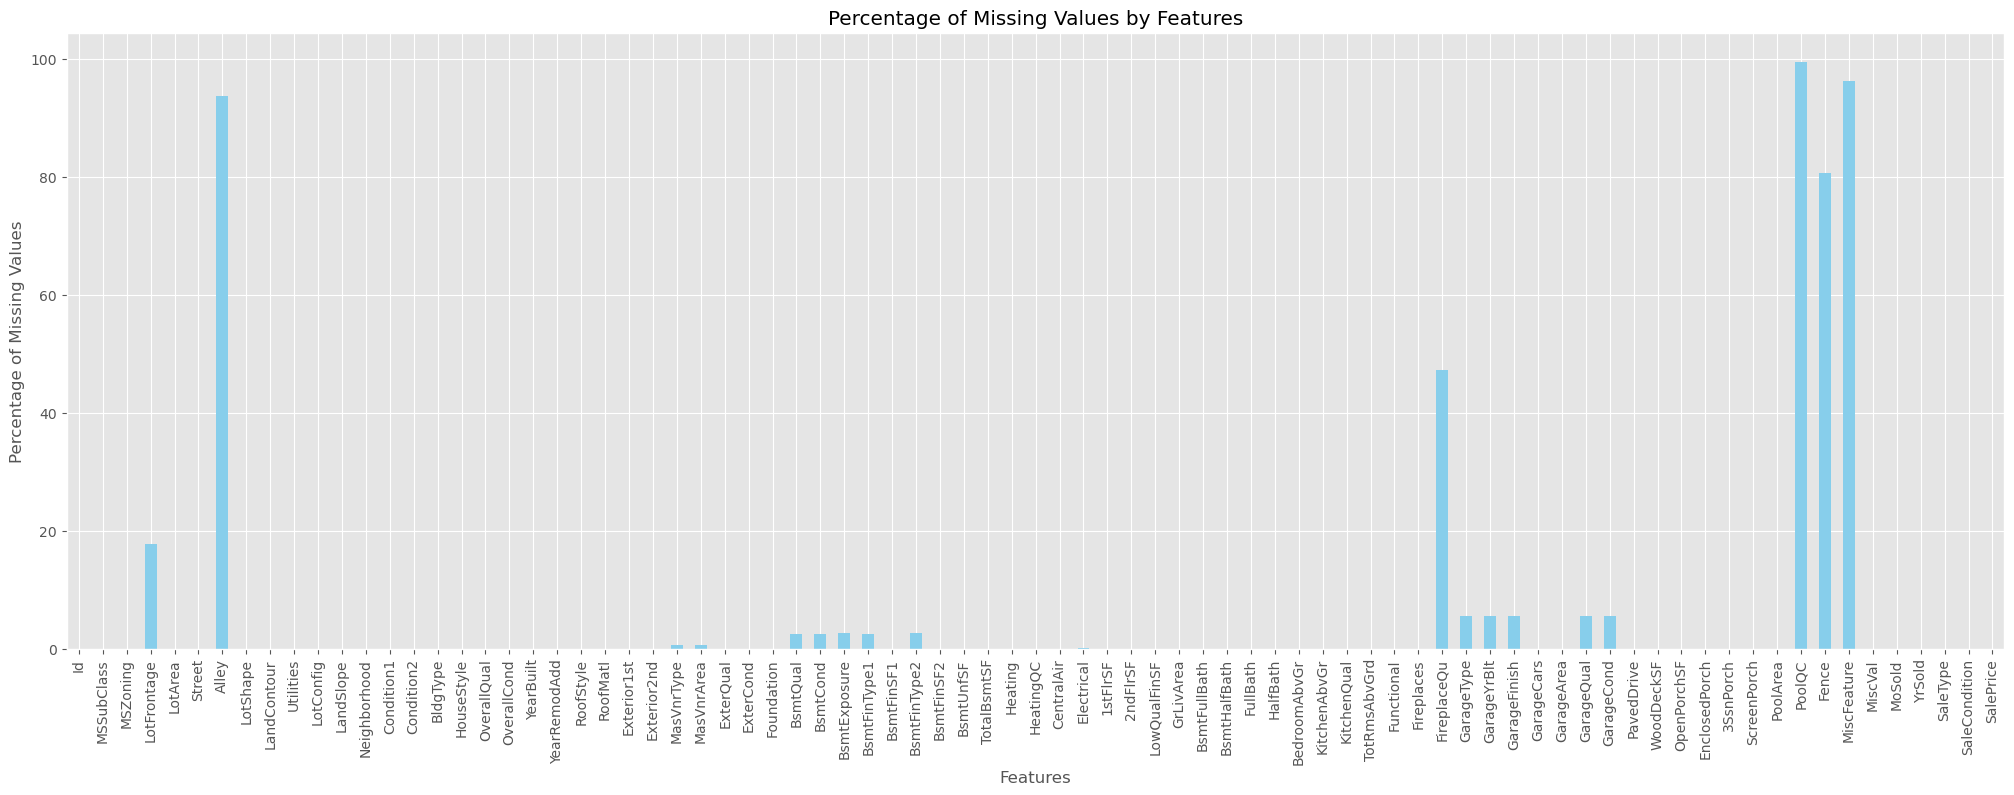

In [17]:
# Calculate the percentage of missing values for each variable in the train data
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Create a bar plot for missing values percentage
plt.figure(figsize=(25, 8))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values by Features")
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=90)
plt.show()

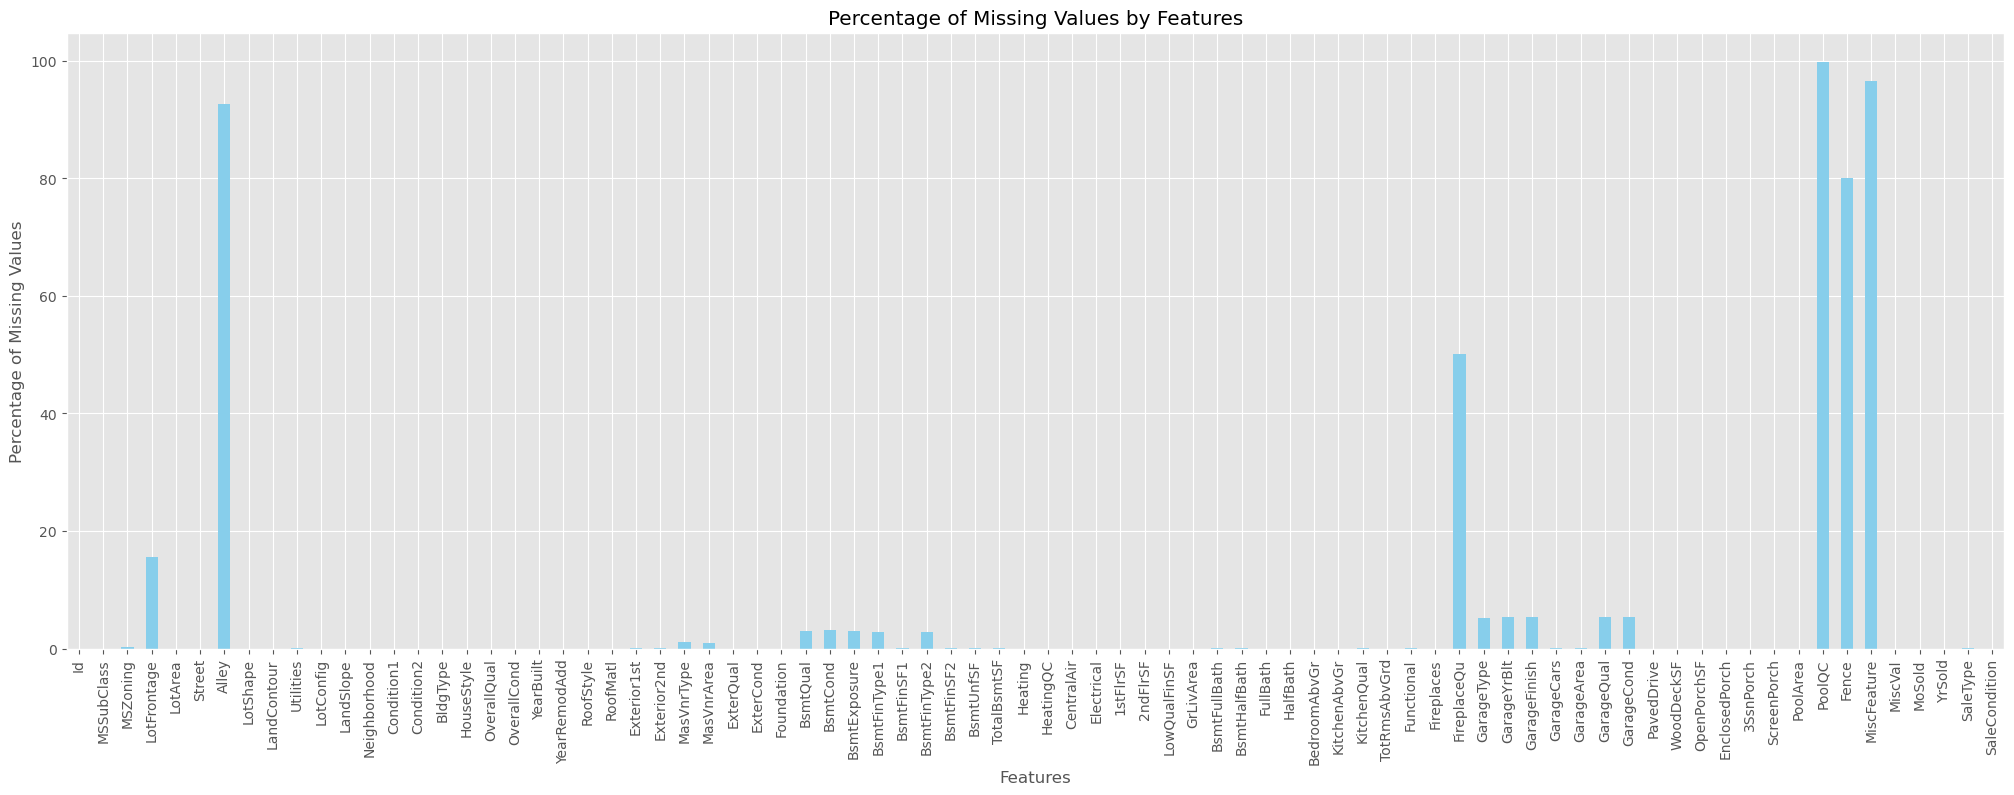

In [18]:
# Calculate the percentage of missing values for each variable in the test data
missing_percentage = (test.isnull().sum() / len(test)) * 100

# Create a bar plot for missing values percentage
plt.figure(figsize=(25, 8))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values by Features")
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=90)
plt.show()

Our dataset boasts a considerable number of independent features, totaling 80, which includes the "Id" column. Out of these, 43 are categorical in nature. To kickstart our analysis, it's beneficial to begin with visualizations, as it may not be immediately evident where to begin. For a comprehensive understanding of each feature, you can refer to the detailed descriptions available via this [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt). It's worth noting that a notable portion of these features contains missing values.

## Exploratory Data Analysis (EDA)

In [19]:
# Summary statistics of the numerical variable
train.describe() 

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [20]:
# Summary statistics of the categorical features
train.select_dtypes(exclude=['int64', 'float64']).describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

### Feature Explopration 

#### SalePrice Distribution

The challenge is to predict the final sale price of the homes. This information is stored in the `SalePrice` column. The value we are trying to predict is often called the target variable.

We can use `Series.describe()` to get more information.

In [21]:
# SalePrice analysis

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price of a house in our dataset is close to `$180000` with most of the values falling within the `$130,000` to `$215,000` range.

Next, we'll check for skewness, which is a measure of the shape of the distribution of values.

Skew is: 1.8828757597682129


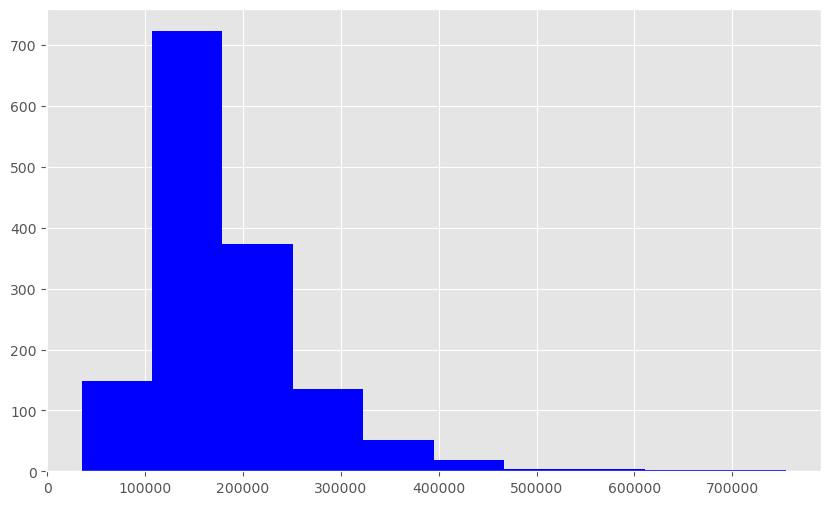

In [22]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

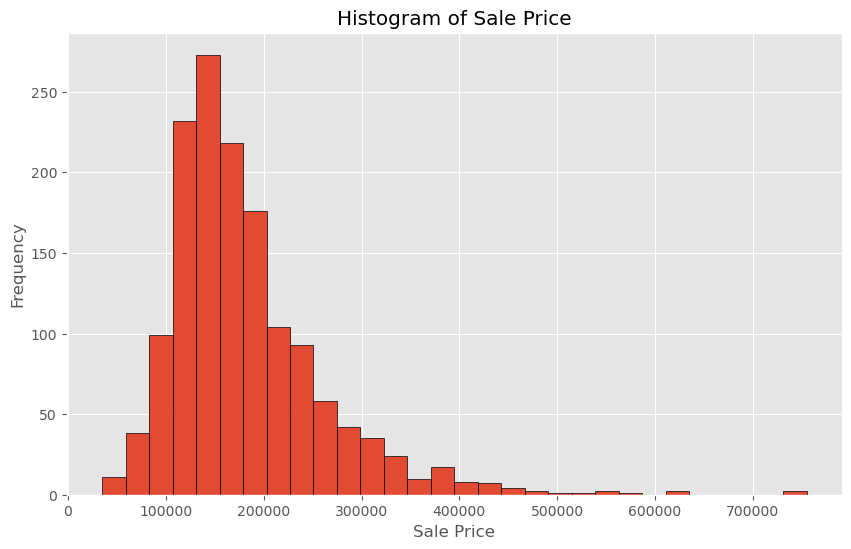

In [23]:
# Increasing the number of bins
plt.figure(figsize=(10, 6))
plt.hist(train['SalePrice'], bins=30, edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')
plt.show()

The plot exhibits a shape akin to a normal distribution, albeit slightly skewed to the right. This characteristic bears significance when considering the implementation of a linear regression model. To align it more closely with a normal distribution, a transformation like the logarithm could be applied. However, our focus in this notebook is centered around advanced decision tree algorithm. Remarkably, the distribution's shape isn't a critical factor in this context.


Now lets use `np.log()` to transform train.SalePrice and calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a normal distribution.

Skew is: 0.12133506220520406


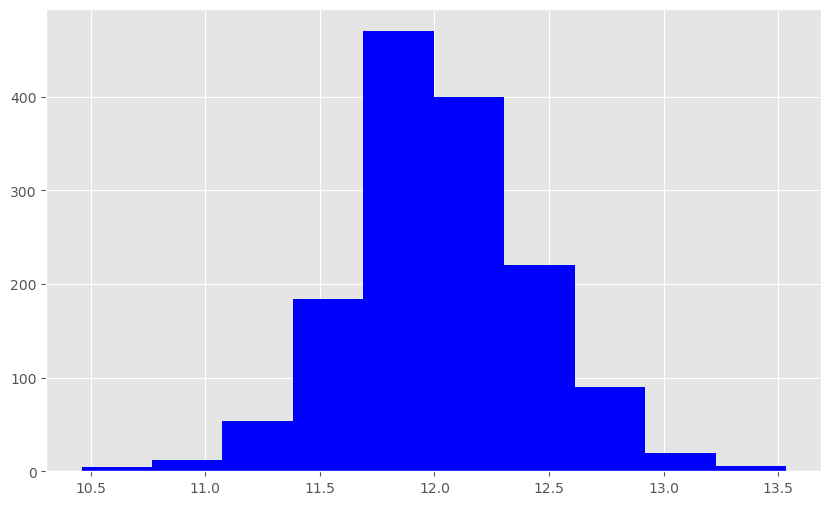

In [24]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### Correlations

To attain a deeper understanding of the relationships among our features, a valuable strategy involves examining their correlations. This method provides us with an insightful perspective on how different features interact with each other.

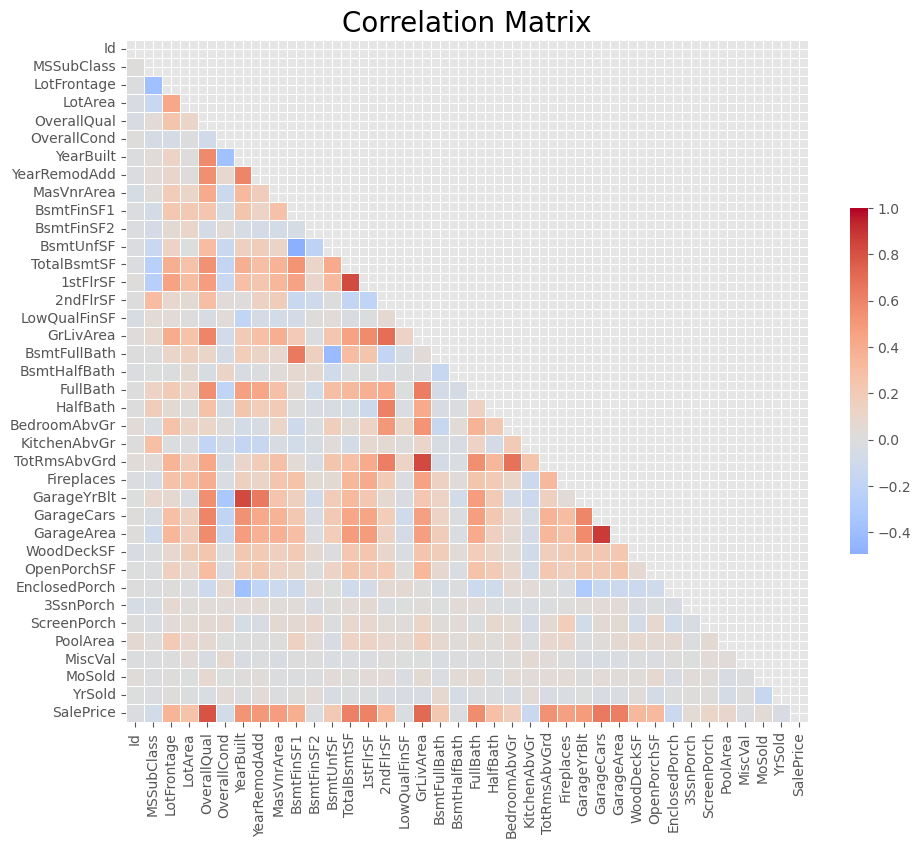

In [25]:
corr = train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [26]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

By observing the visual plot and the correlation statistics presented above, it's evident that the features most strongly correlated with the SalePrice are OverallQual and GrLivArea. These particular attributes hold substantial significance. Moreover, the plot reveals numerous notably darker squares between various features, such as GarageCars compared to GarageArea, GarageYrBlt compared to YearBuilt, and others. This intricate interplay might appear complex from the graph alone.

In [27]:
corr_coef = train.corr().stack().reset_index()

In [28]:
corr_coef

level_0      level_1         0
0            Id           Id  1.000000
1            Id   MSSubClass  0.011156
2            Id  LotFrontage -0.010601
3            Id      LotArea -0.033226
4            Id  OverallQual -0.028365
...         ...          ...       ...
1439  SalePrice     PoolArea  0.092404
1440  SalePrice      MiscVal -0.021190
1441  SalePrice       MoSold  0.046432
1442  SalePrice       YrSold -0.028923
1443  SalePrice    SalePrice  1.000000

[1444 rows x 3 columns]

In [29]:
corr_coef.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']

In [30]:
corr_coef

Feature 1    Feature 2  Correlation Coefficient
0            Id           Id                 1.000000
1            Id   MSSubClass                 0.011156
2            Id  LotFrontage                -0.010601
3            Id      LotArea                -0.033226
4            Id  OverallQual                -0.028365
...         ...          ...                      ...
1439  SalePrice     PoolArea                 0.092404
1440  SalePrice      MiscVal                -0.021190
1441  SalePrice       MoSold                 0.046432
1442  SalePrice       YrSold                -0.028923
1443  SalePrice    SalePrice                 1.000000

[1444 rows x 3 columns]

In [31]:
# Sort each pair of variables
corr_coef[['Feature 1', 'Feature 2']] = np.sort(corr_coef[['Feature 1', 'Feature 2']], axis=1)

In [32]:
corr_coef[corr_coef['Feature 1'] != corr_coef['Feature 2']].drop_duplicates().sort_values(by='Correlation Coefficient', ascending=False)

Feature 1     Feature 2  Correlation Coefficient
1015     GarageArea    GarageCars                 0.882475
253     GarageYrBlt     YearBuilt                 0.825667
631       GrLivArea  TotRmsAbvGrd                 0.825489
469        1stFlrSF   TotalBsmtSF                 0.819530
189     OverallQual     SalePrice                 0.790982
...             ...           ...                      ...
196     OverallCond     YearBuilt                -0.375983
40      LotFrontage    MSSubClass                -0.386347
258   EnclosedPorch     YearBuilt                -0.387268
435    BsmtFullBath     BsmtUnfSF                -0.422900
353      BsmtFinSF1     BsmtUnfSF                -0.495251

[703 rows x 3 columns]

In [33]:
corr_coef[corr_coef['Feature 1'] != corr_coef['Feature 2']].drop_duplicates().sort_values(
    by='Correlation Coefficient', ascending=False).head(10)

Feature 1     Feature 2  Correlation Coefficient
1015    GarageArea    GarageCars                 0.882475
253    GarageYrBlt     YearBuilt                 0.825667
631      GrLivArea  TotRmsAbvGrd                 0.825489
469       1stFlrSF   TotalBsmtSF                 0.819530
189    OverallQual     SalePrice                 0.790982
645      GrLivArea     SalePrice                 0.708624
548       2ndFlrSF     GrLivArea                 0.687501
821   BedroomAbvGr  TotRmsAbvGrd                 0.676620
359     BsmtFinSF1  BsmtFullBath                 0.649212
291    GarageYrBlt  YearRemodAdd                 0.642277

In [34]:
# Compute pairwise correlation of columns, and stack it for easy filtering and sorting
corr = train.corr().stack().reset_index()

# Give names to the correlation DataFrame columns
corr.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']

# Sort each pair of variables
corr[['Feature 1', 'Feature 2']] = np.sort(corr[['Feature 1', 'Feature 2']], axis=1)

# Drop duplicate pairs and self-correlations
sorted_corr = corr[corr['Feature 1'] != corr['Feature 2']].drop_duplicates().sort_values(by='Correlation Coefficient', ascending=False)

# Display the top 10 positively cross-correlated feature pairs
print("Top 10 Positively Cross-Correlated Features:\n")
sorted_corr.head(10)

Top 10 Positively Cross-Correlated Features:



Feature 1     Feature 2  Correlation Coefficient
1015    GarageArea    GarageCars                 0.882475
253    GarageYrBlt     YearBuilt                 0.825667
631      GrLivArea  TotRmsAbvGrd                 0.825489
469       1stFlrSF   TotalBsmtSF                 0.819530
189    OverallQual     SalePrice                 0.790982
645      GrLivArea     SalePrice                 0.708624
548       2ndFlrSF     GrLivArea                 0.687501
821   BedroomAbvGr  TotRmsAbvGrd                 0.676620
359     BsmtFinSF1  BsmtFullBath                 0.649212
291    GarageYrBlt  YearRemodAdd                 0.642277

Thoughts and Observations:

- GarageArea and GarageCars: These two features are highly correlated (0.882475), indicating that the size of the garage is closely related to the number of cars it can hold. To avoid multicollinearity, consider dropping GarageArea and keeping GarageCars, which is more directly related to the number of cars.

- GarageYrBlt and YearBuilt: These features are significantly correlated (0.825667). Since GarageYrBlt is often similar to YearBuilt unless a garage was added later, consider retaining YearBuilt for simplicity.

- GrLivArea and TotRmsAbvGrd: These features are strongly correlated (0.825489), suggesting that the total number of rooms above grade is closely tied to the above-grade living area. To prevent redundancy, you might consider using only GrLivArea, which provides a more robust measure of living space.

- 1stFlrSF and TotalBsmtSF: These features have a high correlation (0.819530), indicating that the size of the first floor is similar to the total basement square footage. While both provide information about the home's size, you could potentially drop 1stFlrSF if TotalBsmtSF offers a more comprehensive measure.

- OverallQual and GrLivArea: These features have a strong correlation with SalePrice (0.790982 and 0.708624 respectively). Consider retaining both features, as they are likely contributing significantly to predicting SalePrice.

Also let's check the mostly correlated with SalePrice

In [35]:
# Compute pairwise correlation of columns
correlation = train.corr()

# Sort correlations with 'target' in descending order and take the first 15
top_corr_features = correlation['SalePrice'].sort_values(ascending=False).head(15)

# Display top 15 positively correlated features
print("Top 10 Positively Correlated Features:\n")
print(top_corr_features)

# Sort correlations with 'target' in ascending order and take the first 15
bottom_corr_features = correlation['SalePrice'].sort_values(ascending=True).head(15)

Top 10 Positively Correlated Features:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64



The presence of multicollinearity becomes evident from the strong correlations among the features discussed earlier. Hence, the recommendations to eliminate certain features are indeed well-founded. By following this advice, we can retain the most meaningful attributes in our analysis: OverallQual, GrLivArea, GarageCars, and TotalBsmtSF. It's worth noting that these remaining features each exhibit a correlation exceeding 0.6 with the target variable, SalePrice. This strategic pruning of features not only addresses multicollinearity concerns but also ensures that the retained attributes contribute significantly to the predictive power of the model.

In [36]:
# A closer look at the top most useful features as seen from the analysis above;

top_features = [feature for feature in top_corr_features.index if 
                abs(train[[feature, 'SalePrice']].corr().iloc[0, 1]) > 0.6 and 
                feature != 'SalePrice']

In [37]:
top_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF']

In [38]:
# OverallQual

train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [39]:
train.OverallQual.value_counts().sort_values(ascending=False)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Let's show which of the house rating on averaga has the highest sale prices

-  We can create a pivot table to further investigate the relationship between `OverallQual` and `SalePrice`. The Pandas docs demonstrate how to accomplish this task. We set `index='OverallQual'` and `values='SalePrice'`. We chose to look at the median here.

In [40]:
quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

In [41]:
quality_pivot

SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390

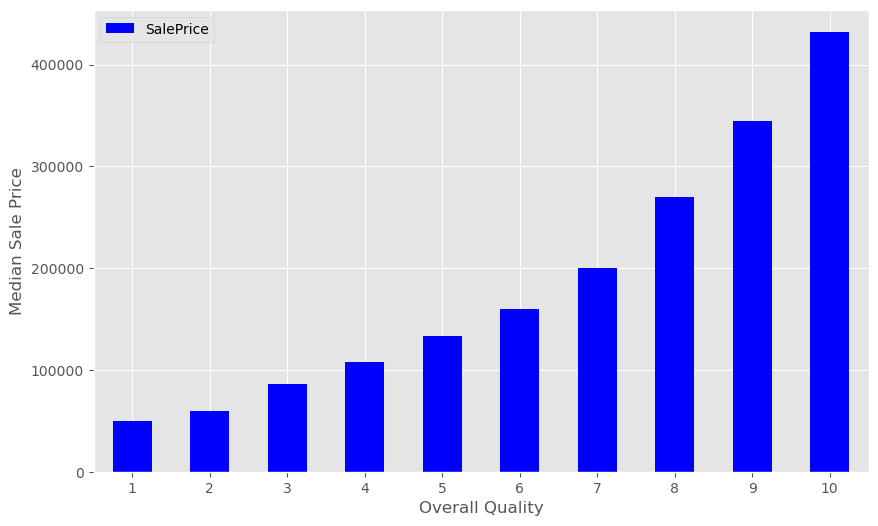

In [42]:
# Visualizing the pivot table to show clearly the average ratings with the highest sale price

quality_pivot.plot(kind='bar', color='b')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

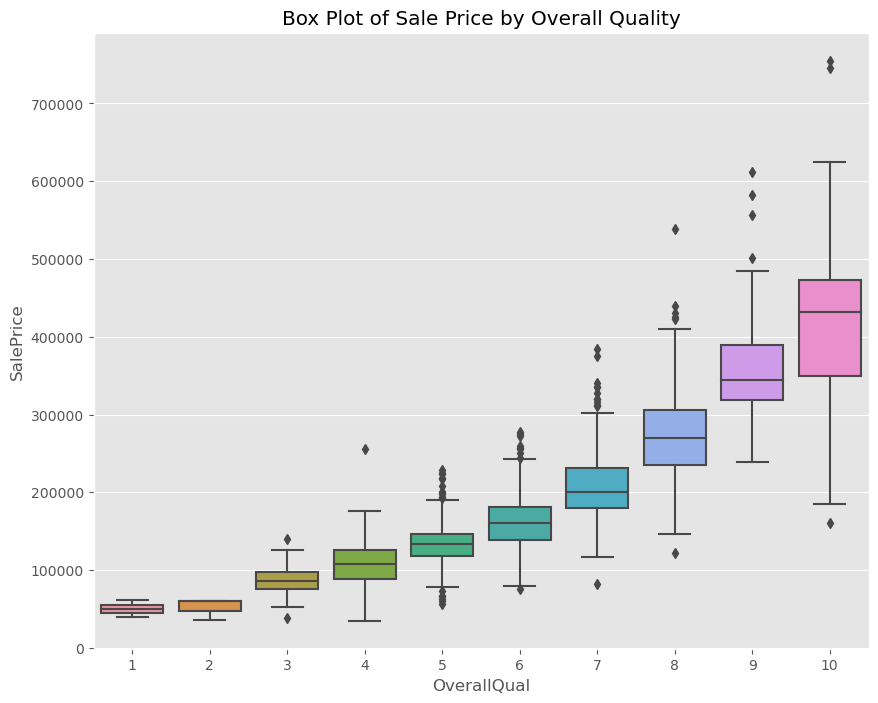

In [43]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 8))  # Optional: Set the figure size
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('Box Plot of Sale Price by Overall Quality')
plt.show()

Notice that the median sales price strictly increases as Overall Quality increases. A clear indication of how important the `Rates the overall material and finish of the house(OverallQual)` as a feature is to our modelling.

In [44]:
top_features = [feature for feature in top_features if feature != 'OverallQual']

In [45]:
top_features

['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

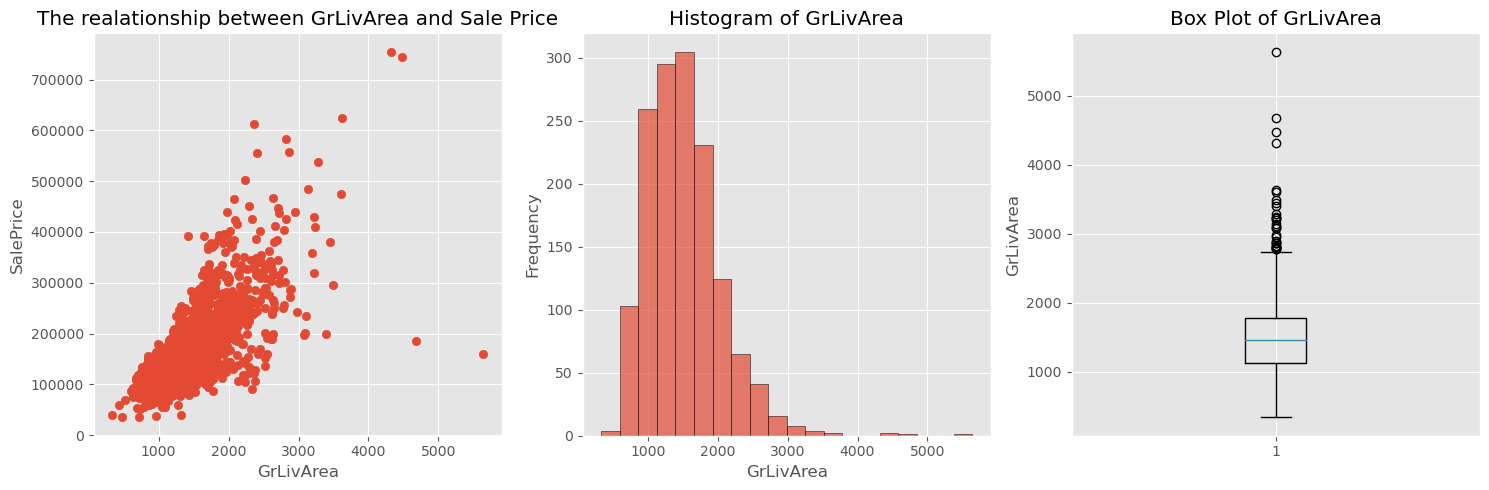

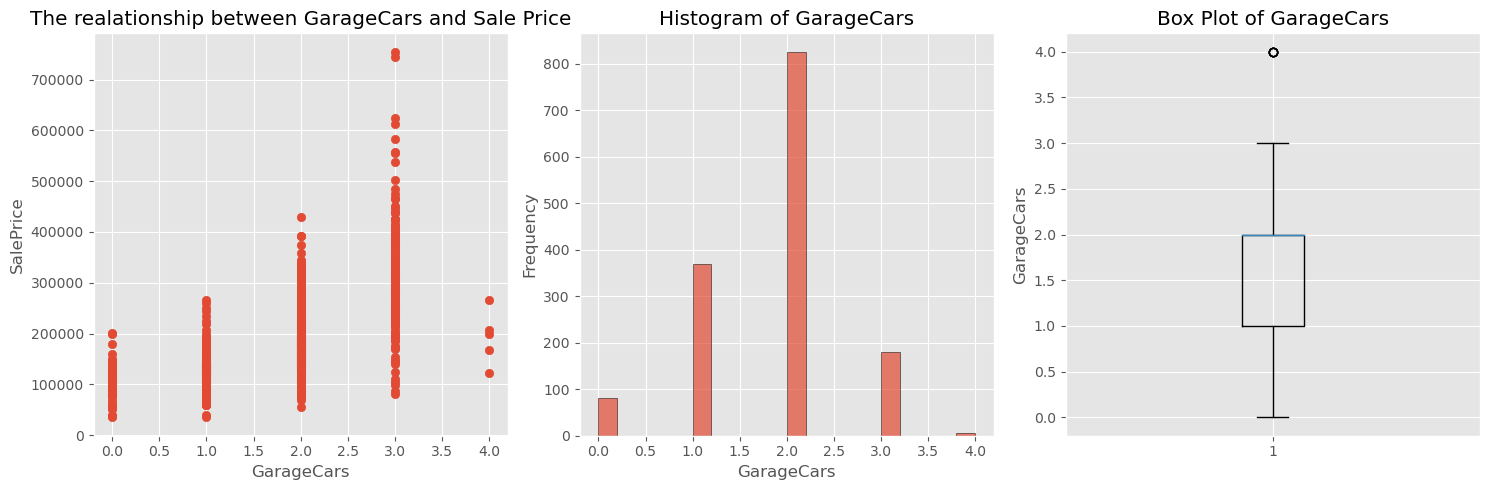

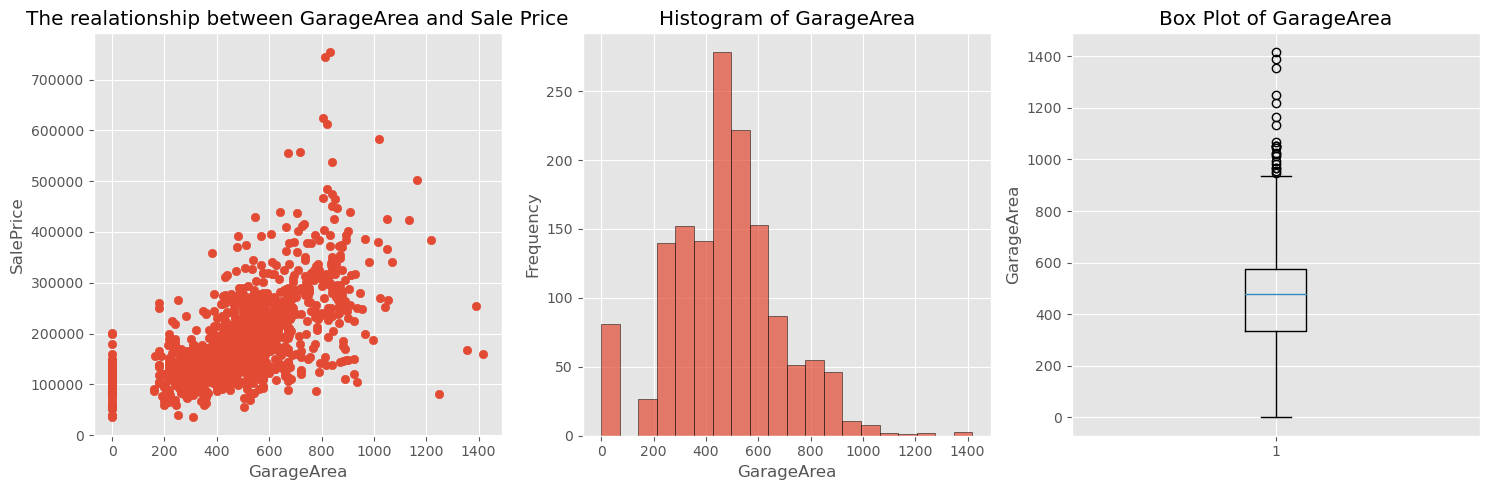

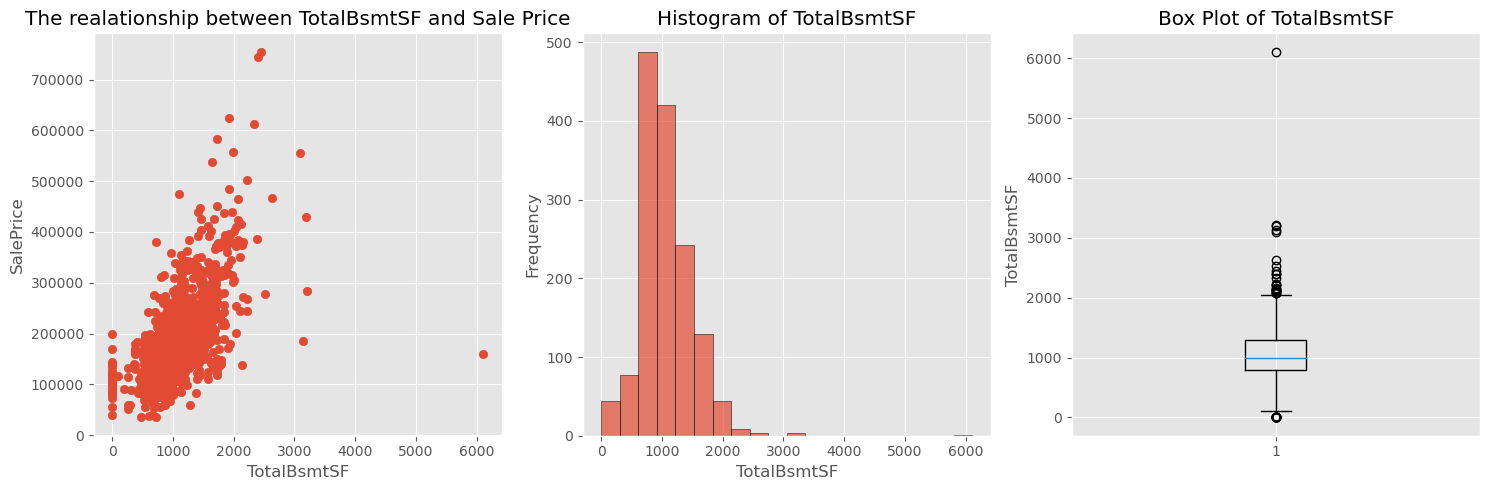

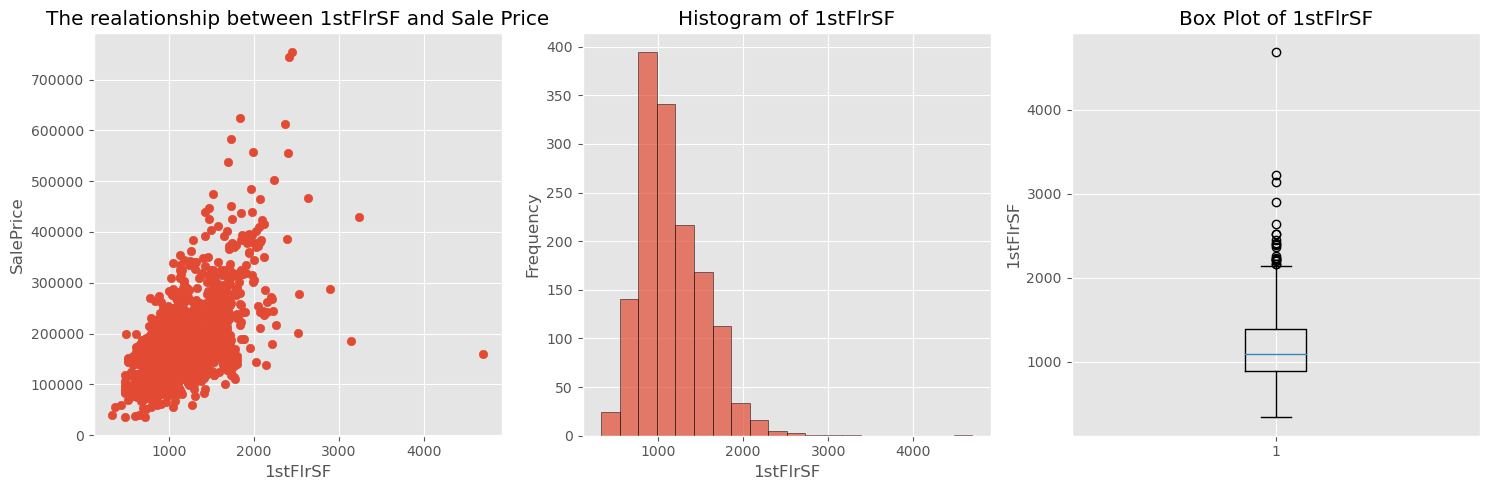

In [46]:
# Create a figure with two subplots
for feature in top_features:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Scatter plot between Sale price and the above stated numerical features
    axes[0].scatter(x=train[feature], y=train['SalePrice'])
    axes[0].set_title(f'The realationship between {feature} and Sale Price')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('SalePrice')

    # Histogram plot
    axes[1].hist(train[feature], bins=20, edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Histogram of {feature}')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Frequency')
    
    # Box plot
    axes[2].boxplot(train[feature])
    axes[2].set_title(f'Box Plot of {feature}')
    axes[2].set_ylabel(feature)

    plt.tight_layout()
    plt.show()

The distribution plot above vividly illustrates that certain features exhibit outliers, a concern we will address in the forthcoming section on outlier removal.

#### Variation betwen Year related columns and SalePrice 

<p style="font-size:15px;">In total, three variables bear relevance to a house's age: YearBuilt, YearRemodAdd, and YearSold. If no remodeling or addition has occurred, YearRemodAdd defaults to YearBuilt. From these Year-related features, we will create two engineered features.</p>

In [47]:
import re

numeric_features = ([feature for feature in train.columns if train[feature]
                     .dtypes != 'O' and feature != 'Id'])

yr_features = ([feature for feature in numeric_features if 
               re.search('Yr|Year', feature) and feature != 'GarageYrBlt'])

In [48]:
yr_features

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [49]:
train[yr_features].head()

YearBuilt  YearRemodAdd  YrSold
0       2003          2003    2008
1       1976          1976    2007
2       2001          2002    2008
3       1915          1970    2006
4       2000          2000    2008

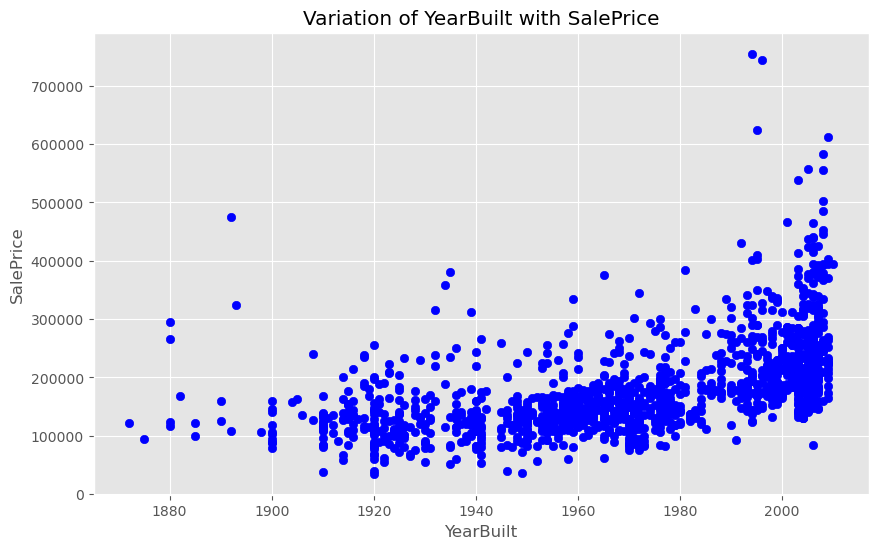

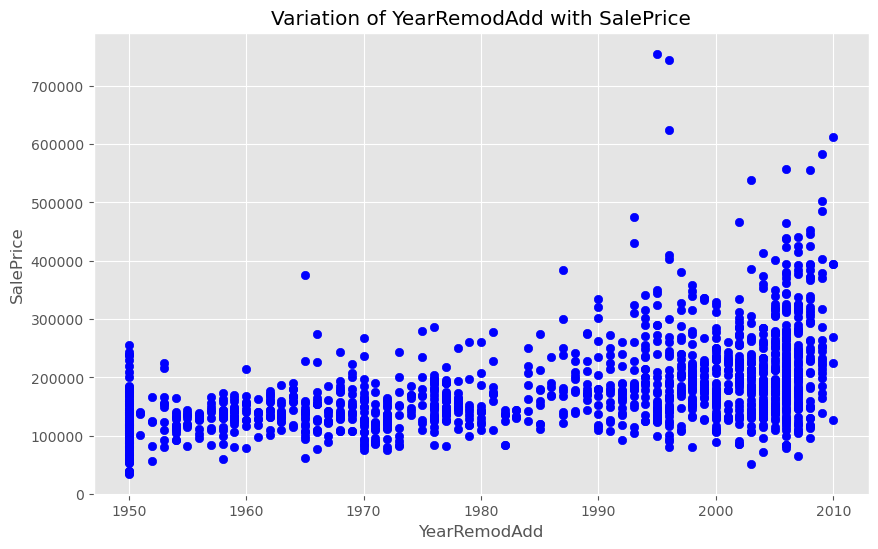

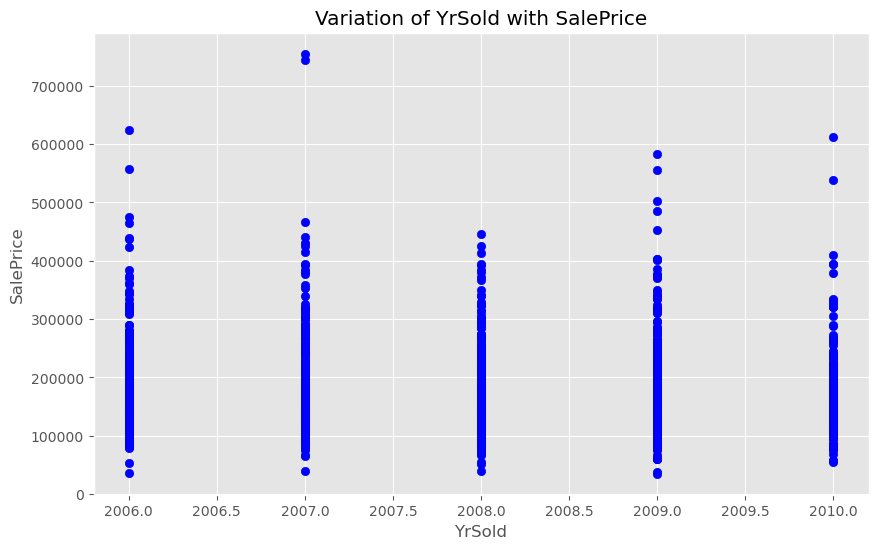

In [50]:
# Visualizing the variation between year related columns and SalePrice

for feature in yr_features:
    plt.scatter(train[feature], train['SalePrice'], color='b')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f"Variation of {feature} with SalePrice")
    plt.show()

- From the plot variation above, the Year sold (YrSold) really doesn't show any clear indication or variation with SalePrice. So to get a better insight of the year sold variation with SalePrice, we will be plotting SalePrice against Age(which is the difference between the YearBuilt and YrSold)

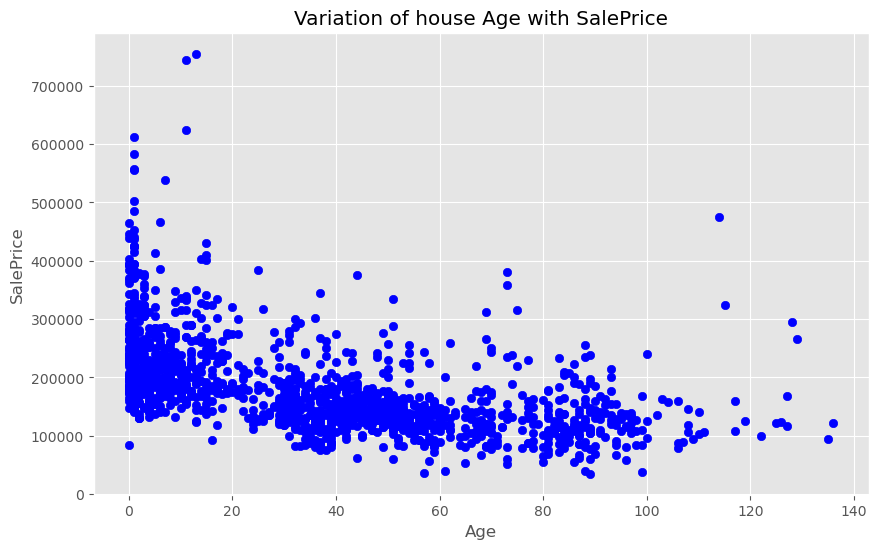

In [51]:
plt.scatter((train['YrSold'] - train['YearBuilt']), train['SalePrice'], color='b')
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.title(f"Variation of house Age with SalePrice")
plt.show()

In [52]:
# The correlation between SalePrice and the difference between YrSold and YearBuilt

(train['YrSold'] - train['YearBuilt']).corr(train['SalePrice'])

-0.523350417546816

The correlation between YearBuilt and SalePrice aligns logically: as the year of construction increases, the sale price tends to rise. However, this relationship might not be immediately intuitive. To gain a clearer perspective, we introduced the concept of "Age" by calculating the difference between YrSold and YearBuilt. Age is a significant determinant of house price; as the age of a property increases, its sale price tends to decrease. This inverse relationship points towards a negative correlation, indicating that newer houses typically command higher prices compared to older ones.

### Categorical Features

To comprehensively understand the relationship between SalePrice and categorical variables, a valuable approach involves utilizing box plots and aggreagation plot. These plots not only illustrate the correlation but also highlight potential outliers that might require removal. By visually examining the distribution and dispersion of SalePrice across different categories, we can gain deeper insights into the impact of categorical variables on housing prices and identify potential anomalies that may affect our analysis.

In [53]:
# Get all categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

In [54]:
# Total length of the categorical columns 
len(categorical_cols)

43

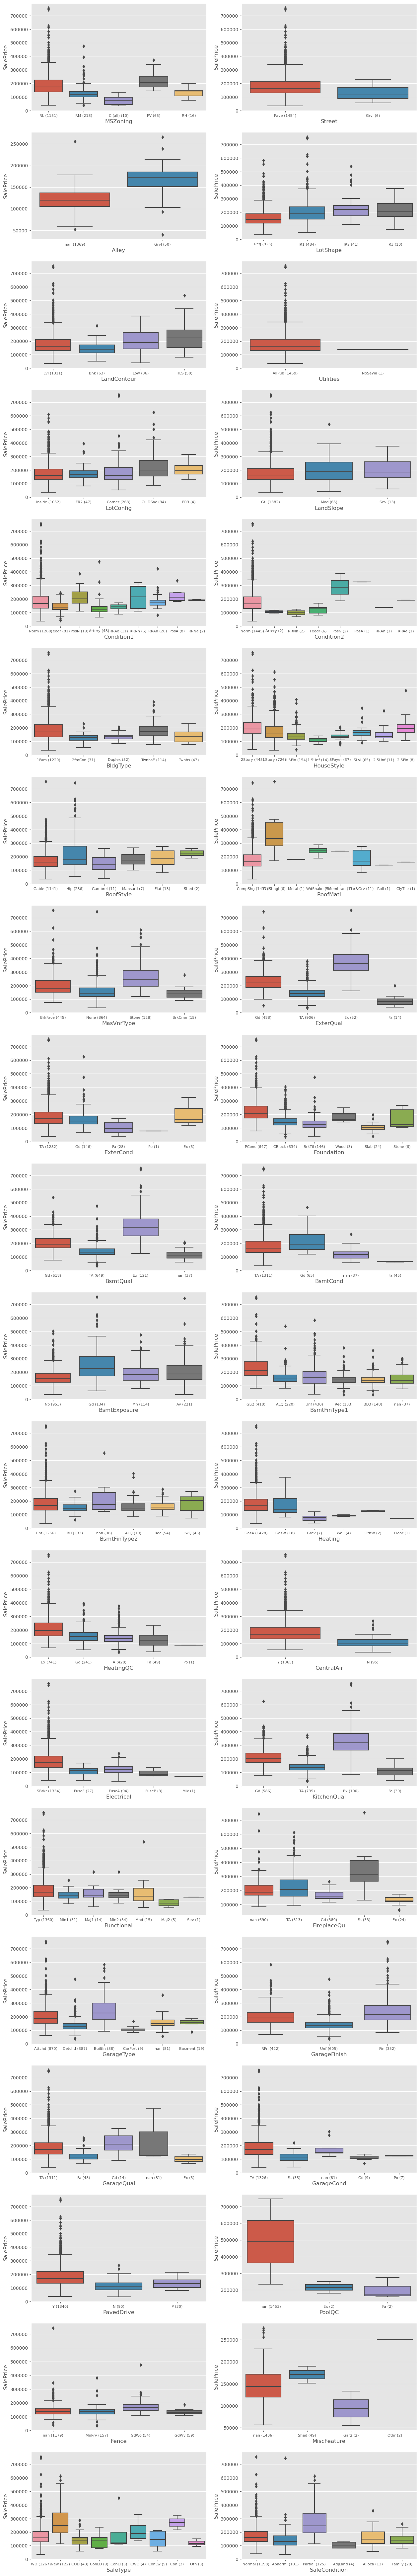

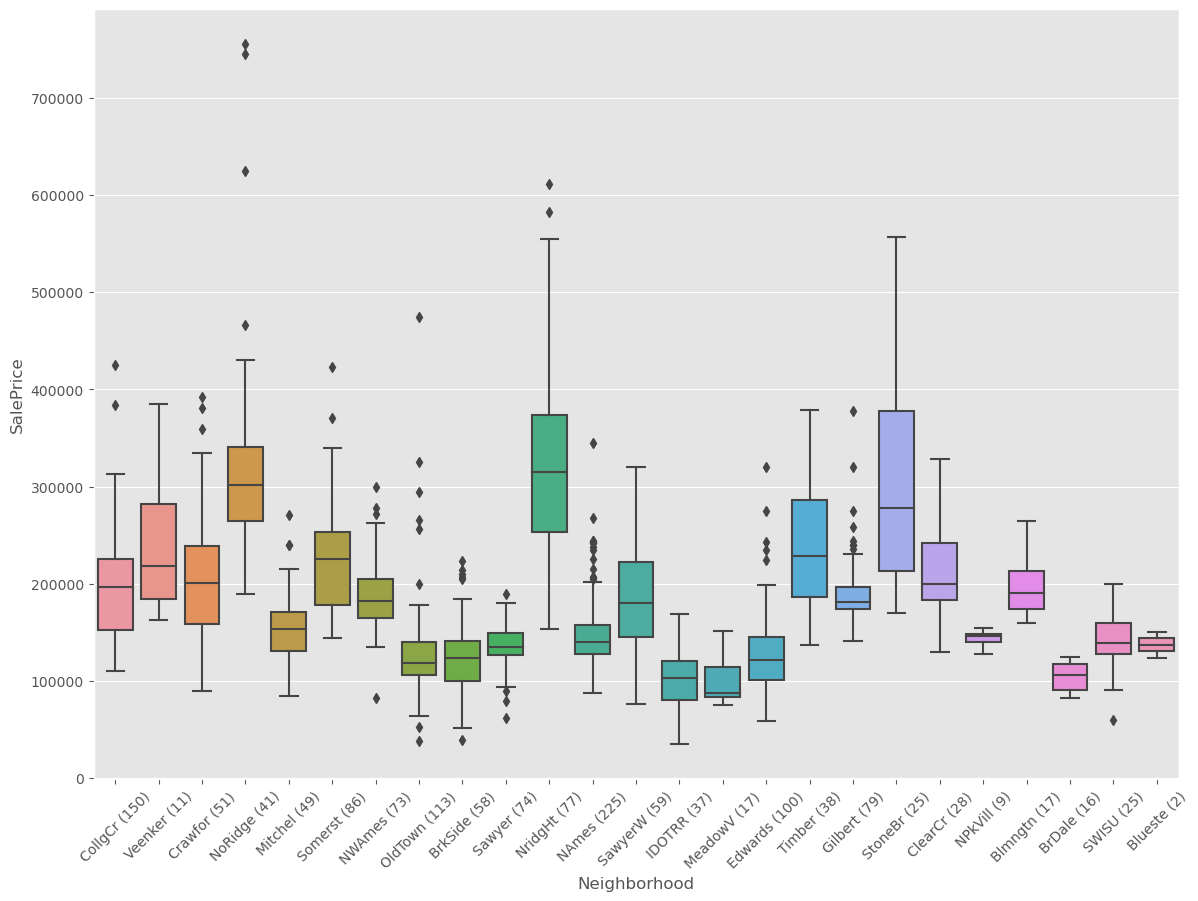

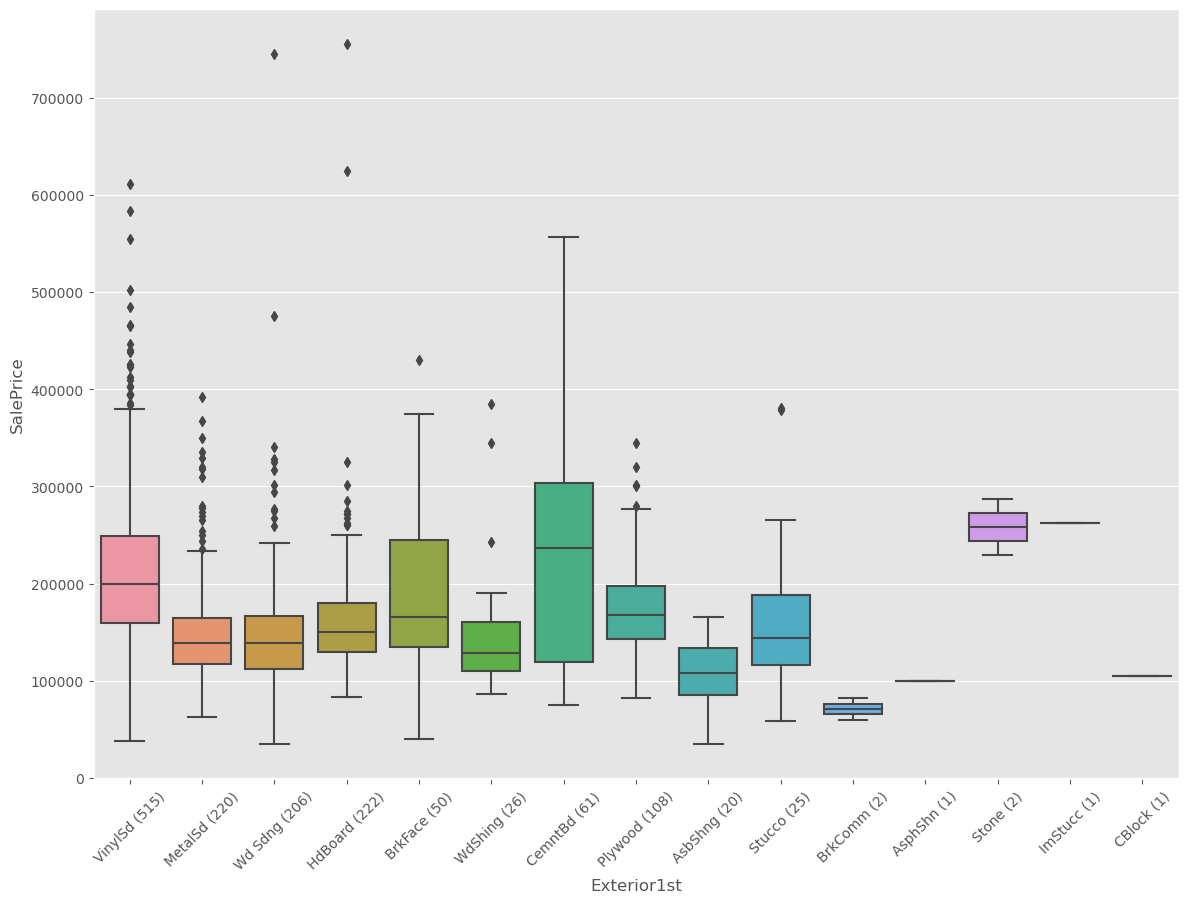

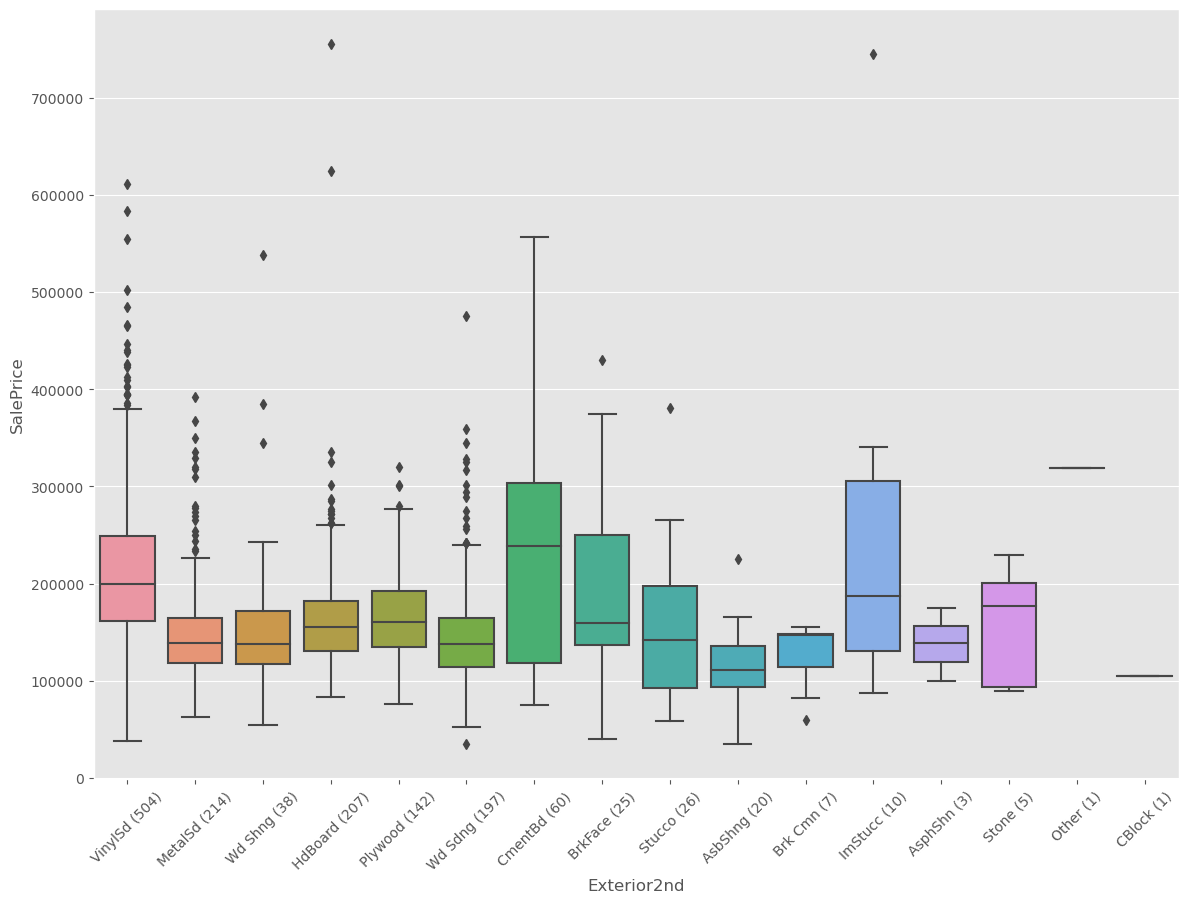

In [55]:
# Defining the number of rows and columns for subplot grid 
# Remove 4 from the total because we are plotting them separately due to labels not fitting
n_rows = math.ceil((len(categorical_cols) - 4) / 2)
n_cols = 2

# Create a figure and a grid of subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows*5))

# List of columns to plot separately
large_plot_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

# Plotting grid subplots
i = 0
for cat_col in categorical_cols:
    if cat_col not in large_plot_cols:
        row = i // n_cols
        col = i % n_cols
        sns.boxplot(x=train[cat_col], y=train['SalePrice'], ax=ax[row, col])
        labels = ['{} ({})'.format(label, train[cat_col].tolist().count(label)) for label in train[cat_col].unique()]
        ax[row, col].set_xticklabels(labels[:len(ax[row, col].get_xticks())], fontsize=8)
        i += 1
# Plotting separate larger plots
for cat_col in large_plot_cols:
    plt.figure(figsize=(14, 10)) 
    sns.boxplot(x=train[cat_col], y=train['SalePrice'])
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    labels = ['{} ({})'.format(label, train[cat_col].tolist().count(label)) for label in train[cat_col].unique()]
    plt.gca().set_xticklabels(labels[:len(plt.gca().get_xticks())])
    plt.show()

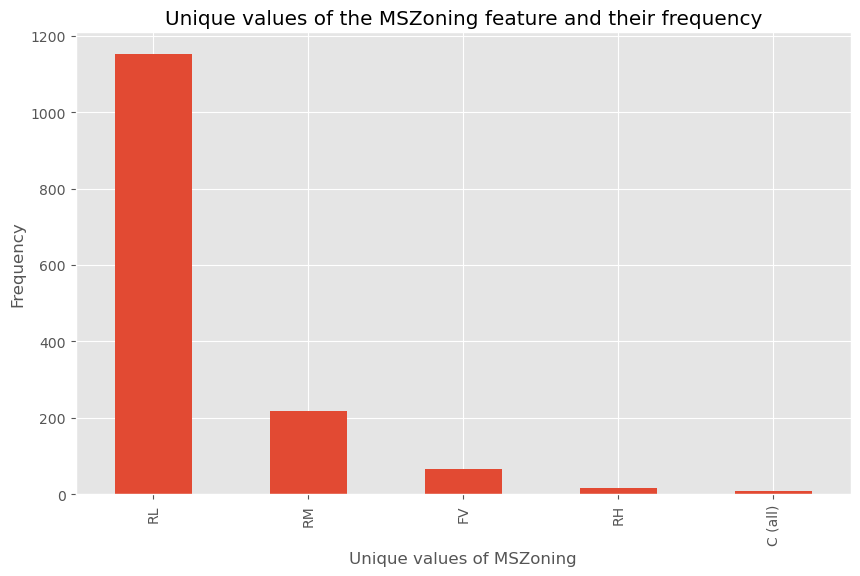

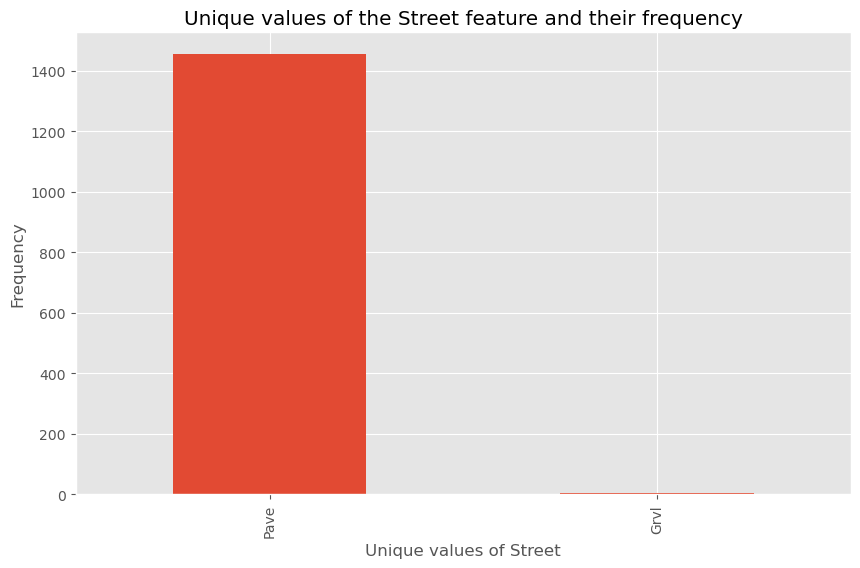

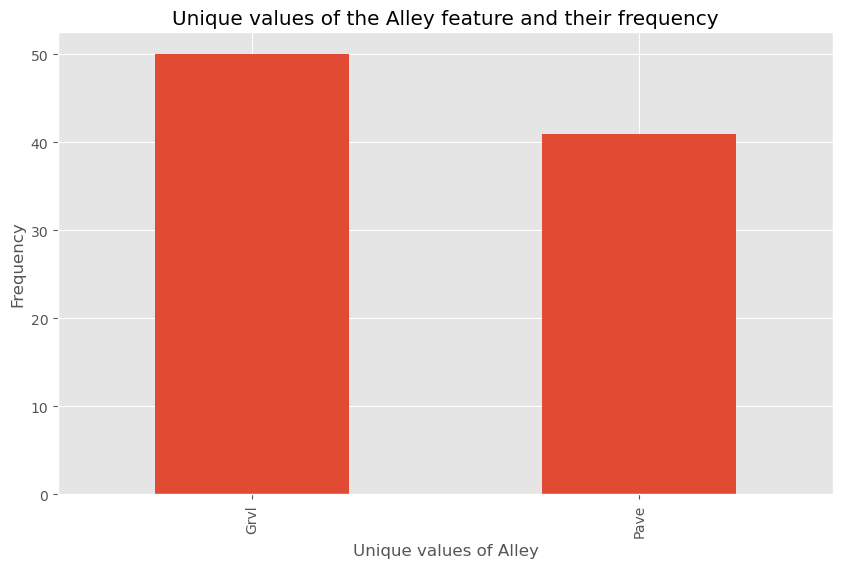

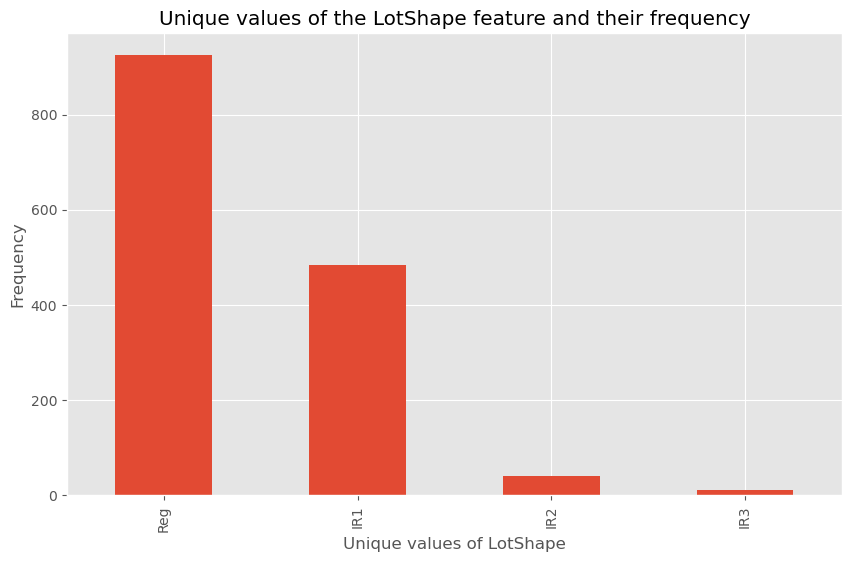

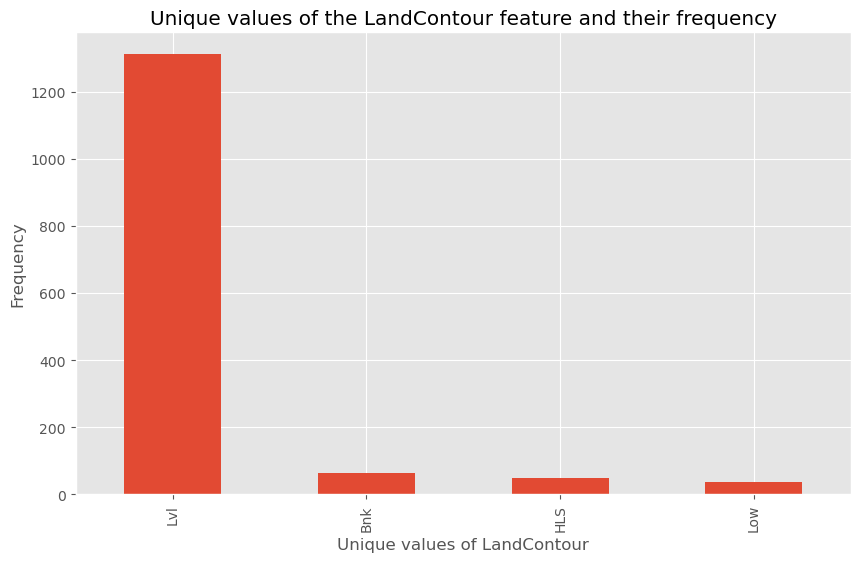

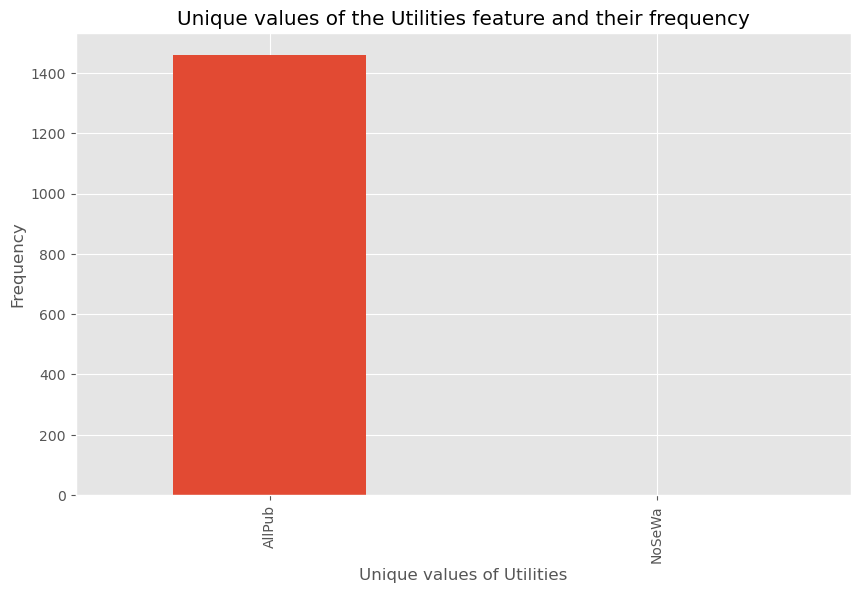

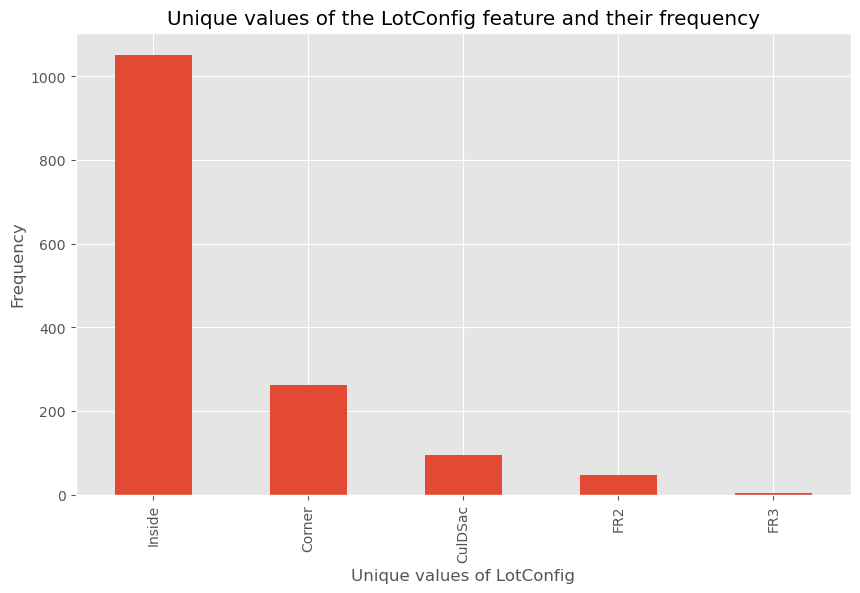

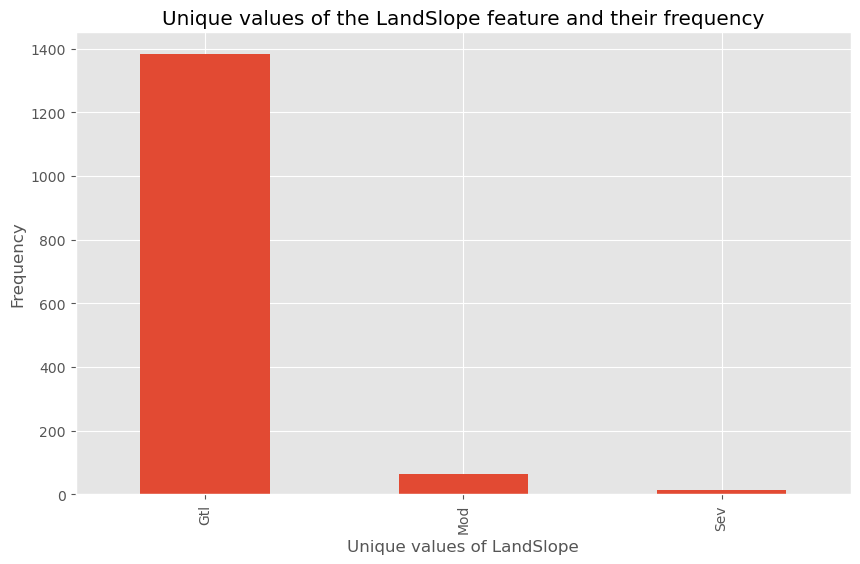

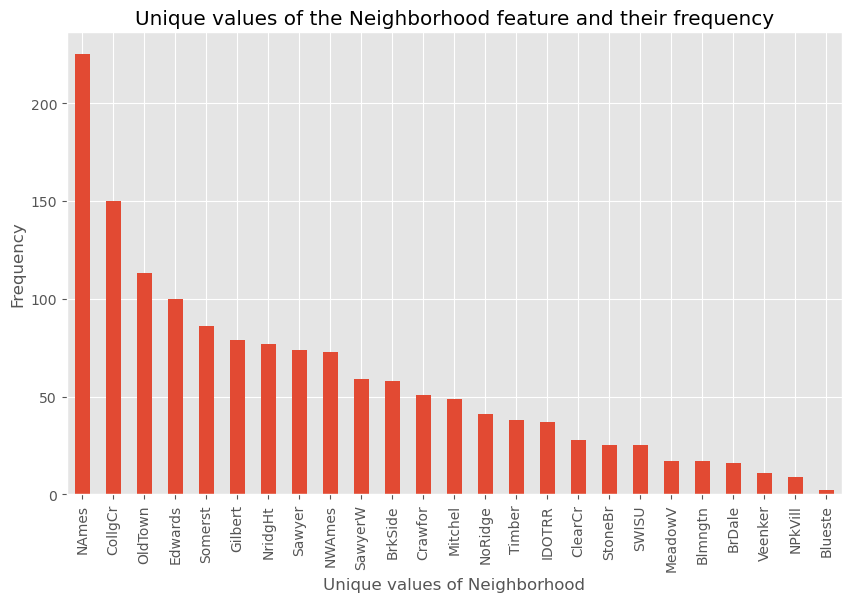

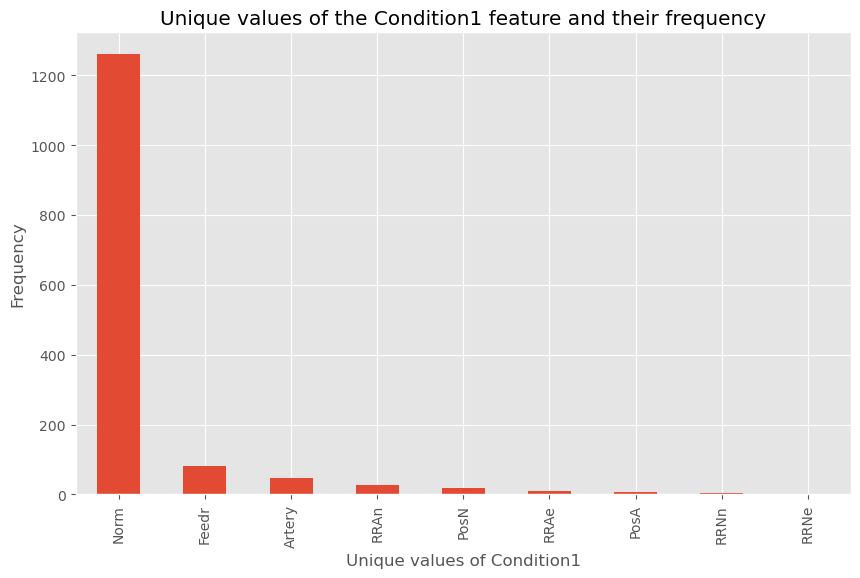

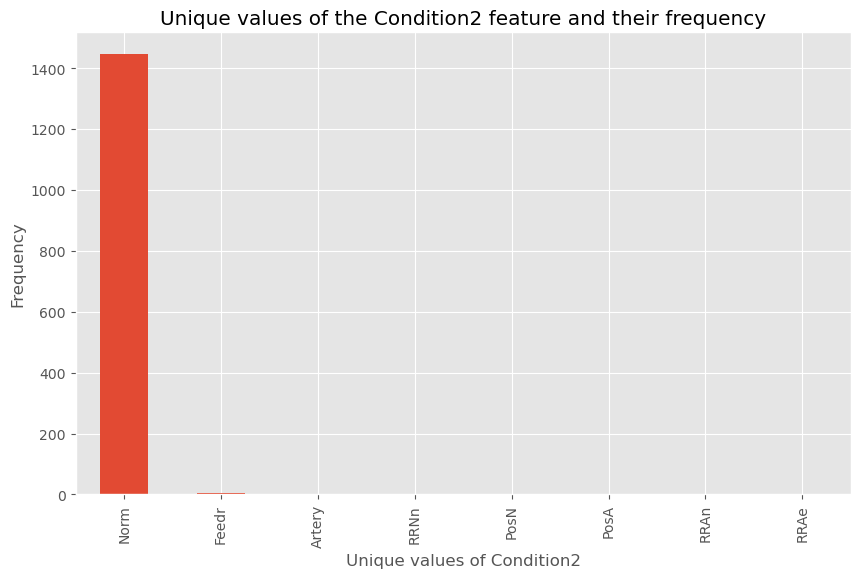

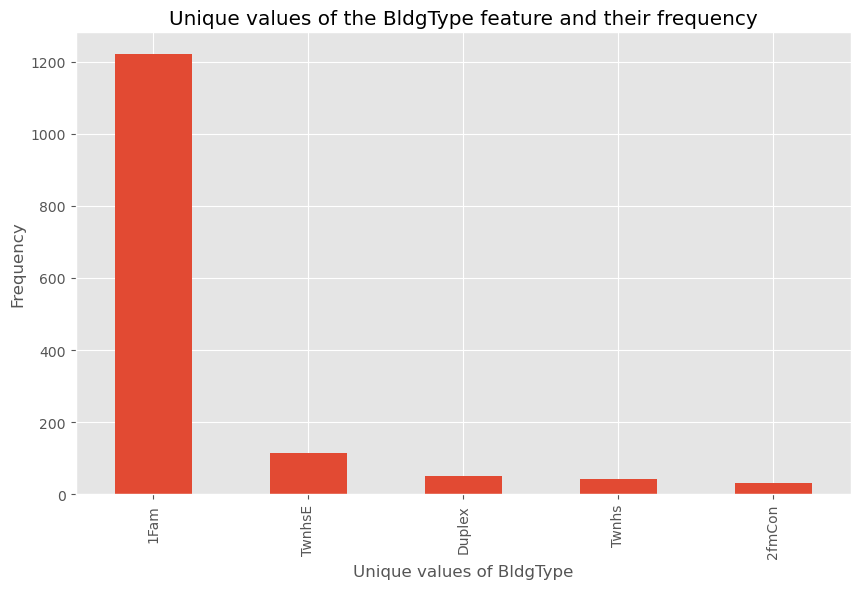

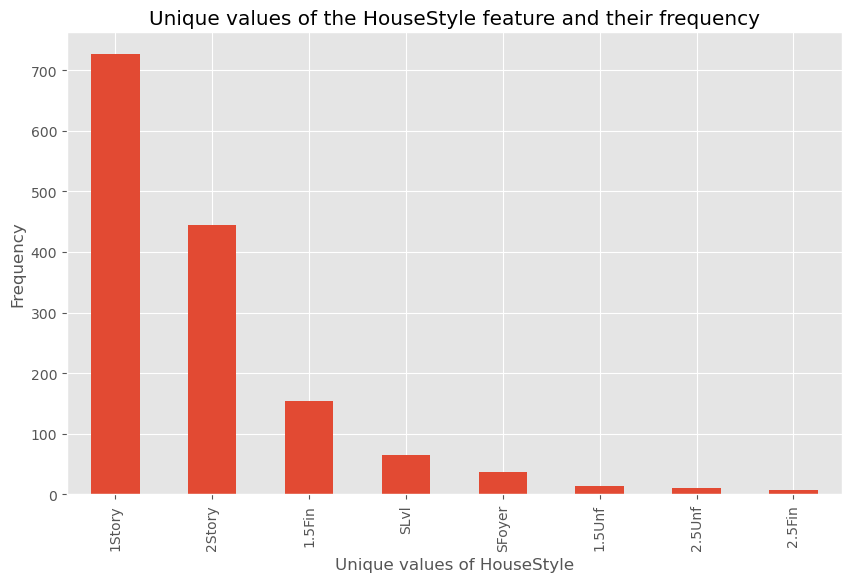

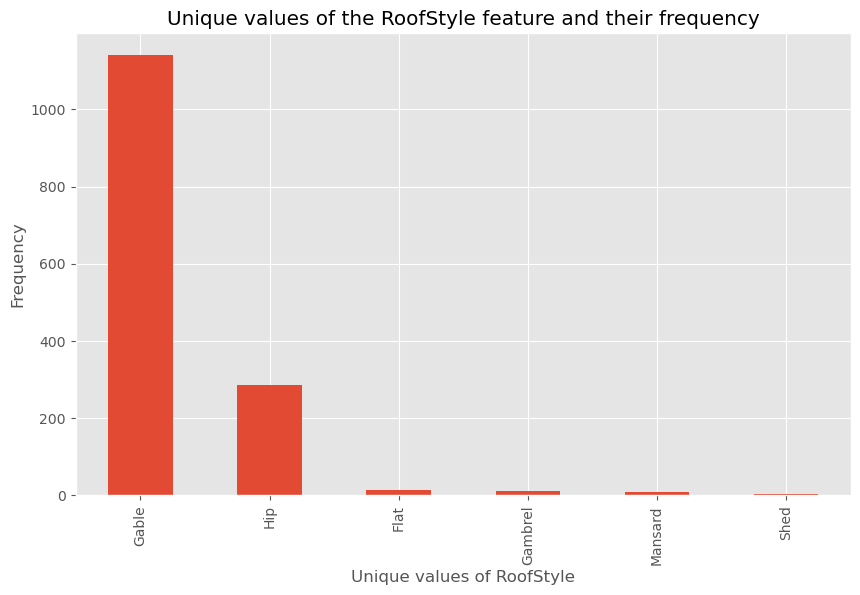

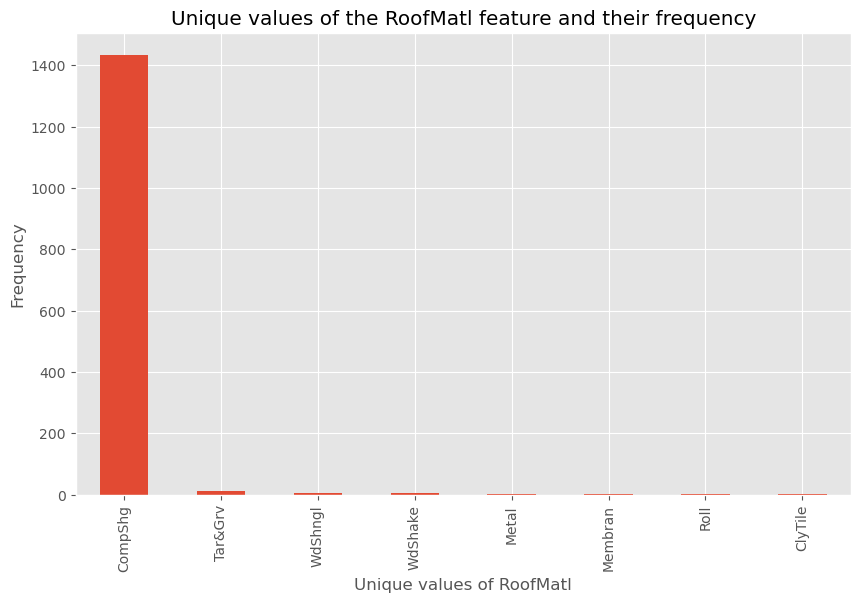

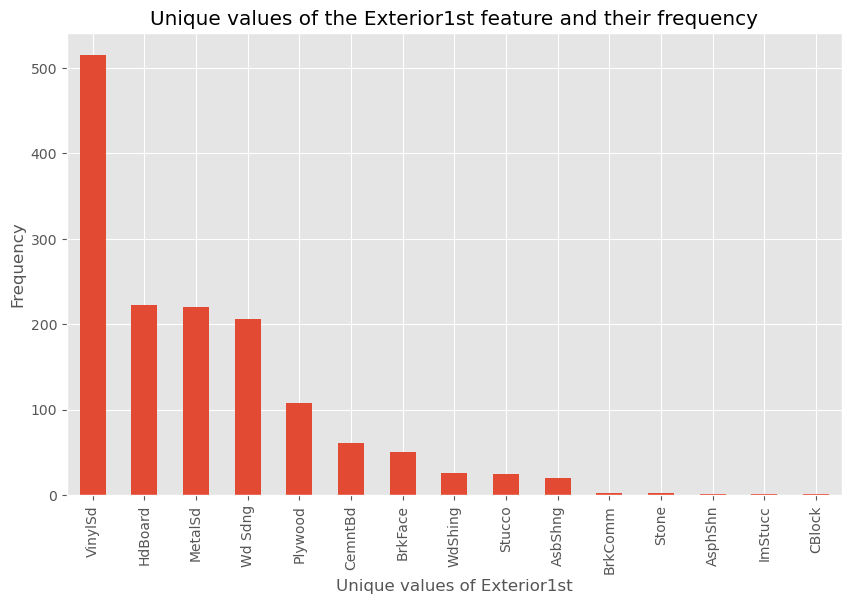

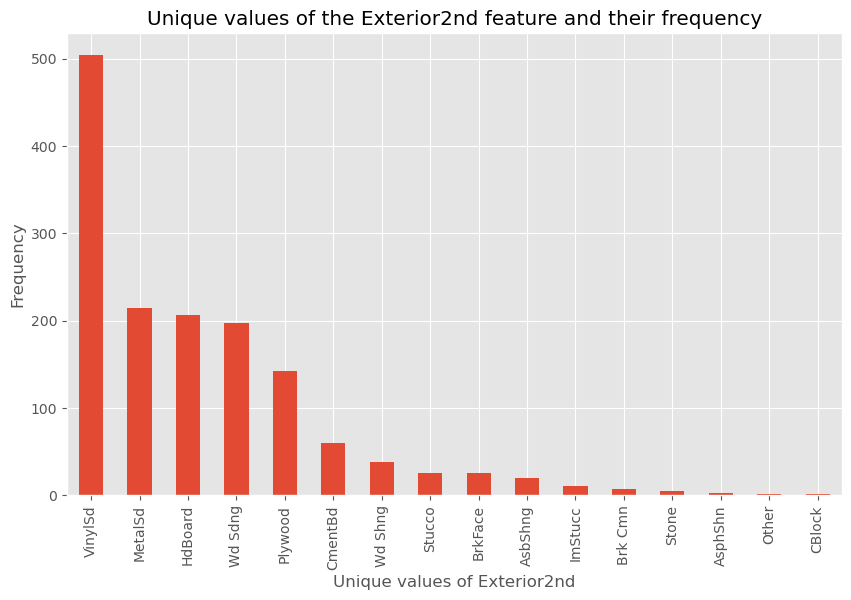

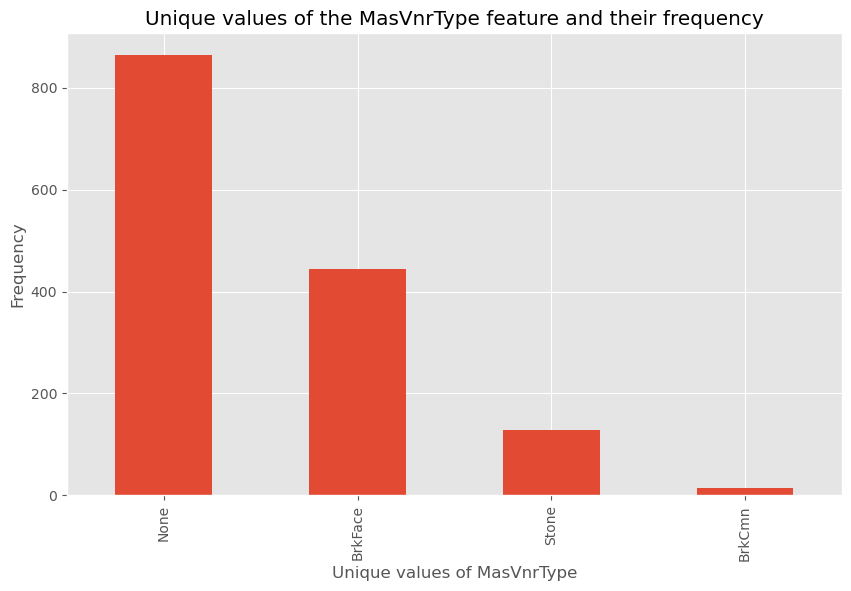

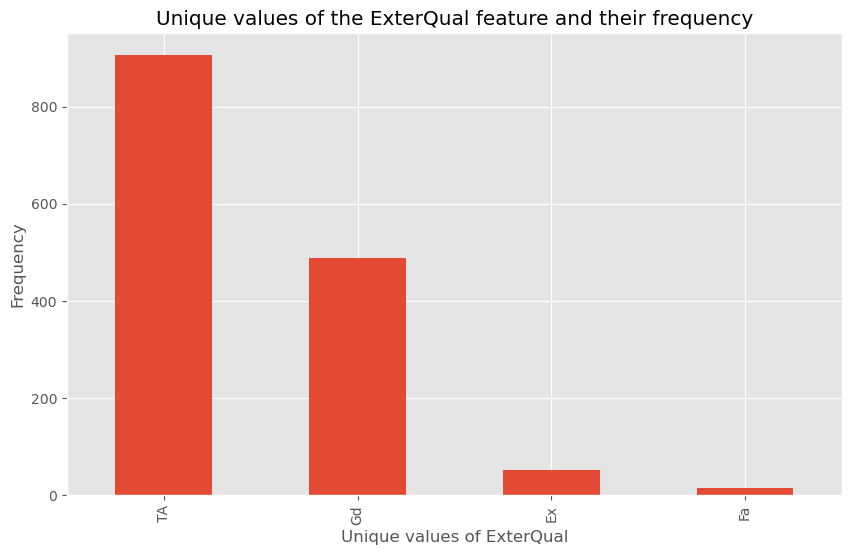

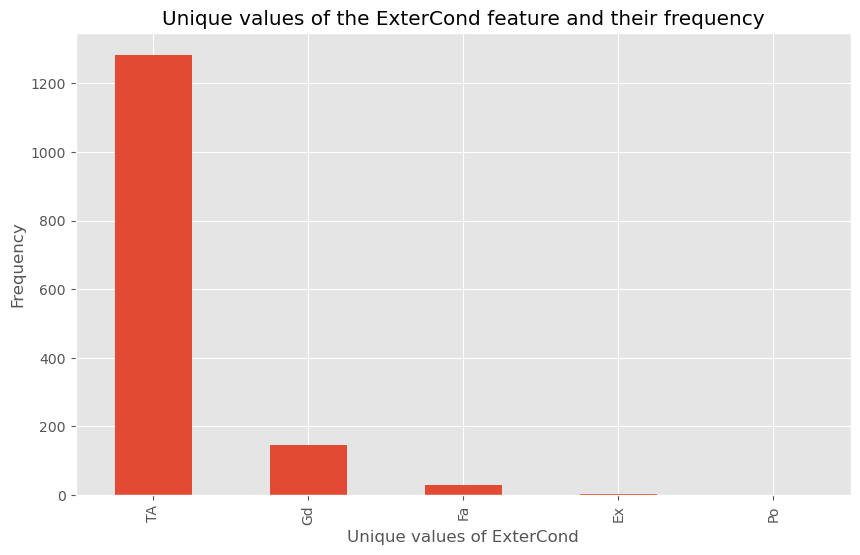

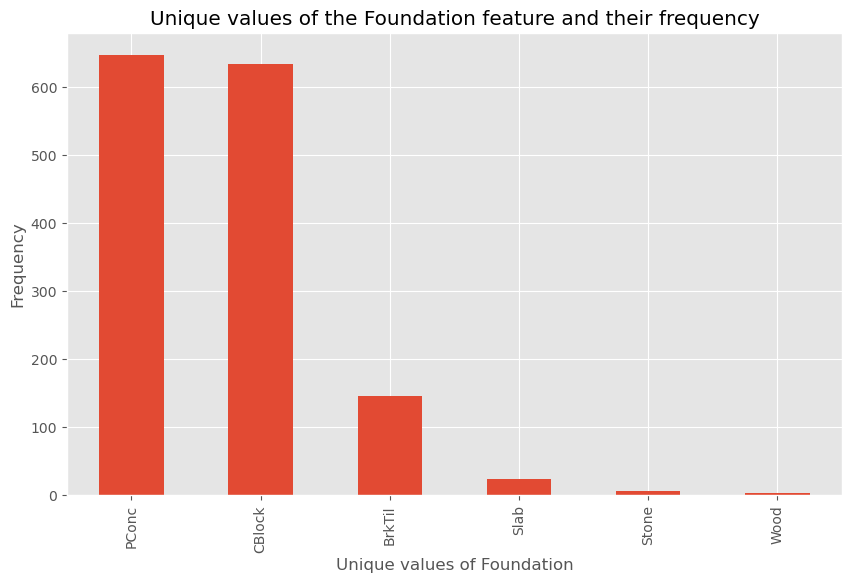

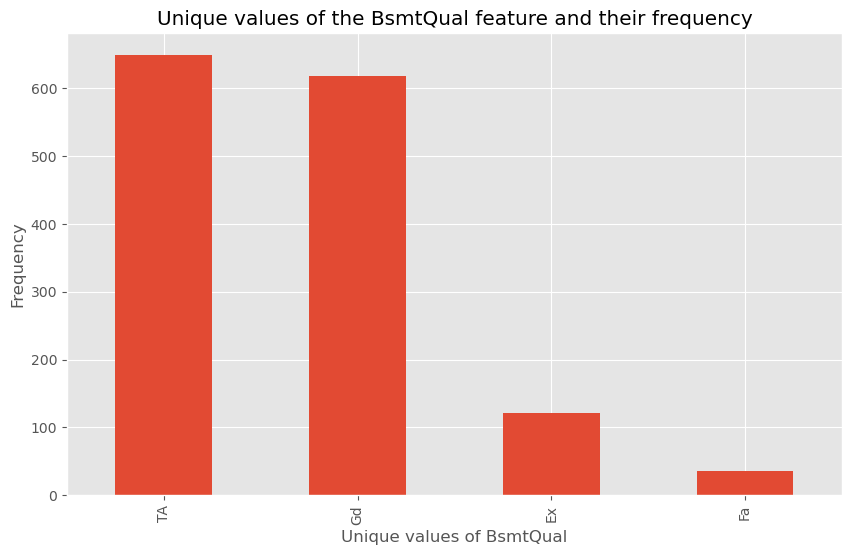

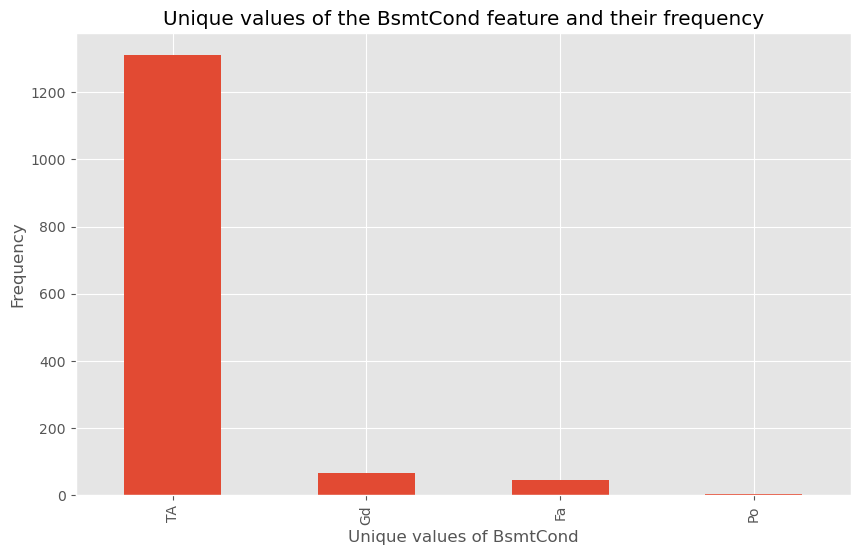

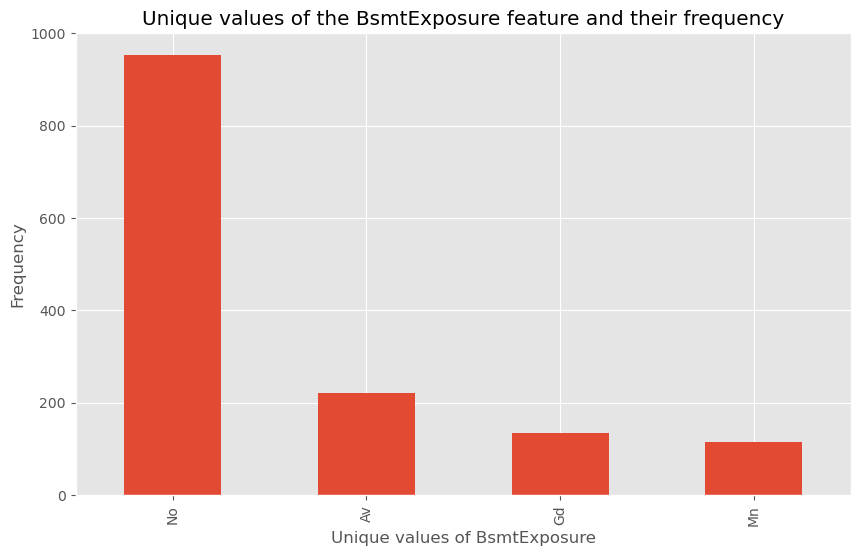

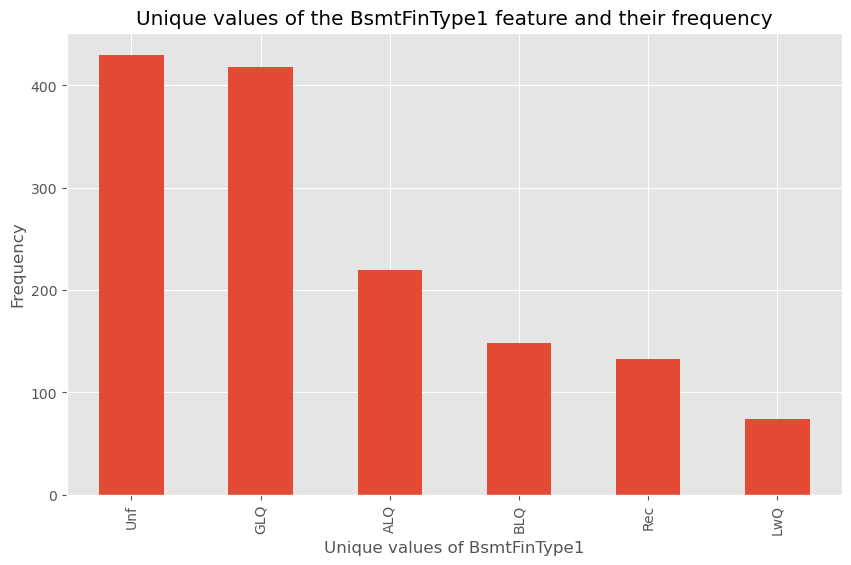

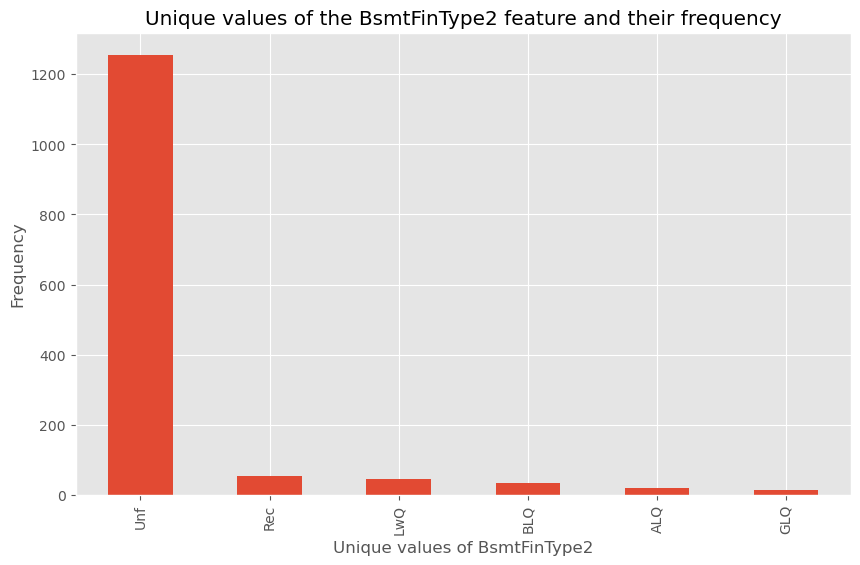

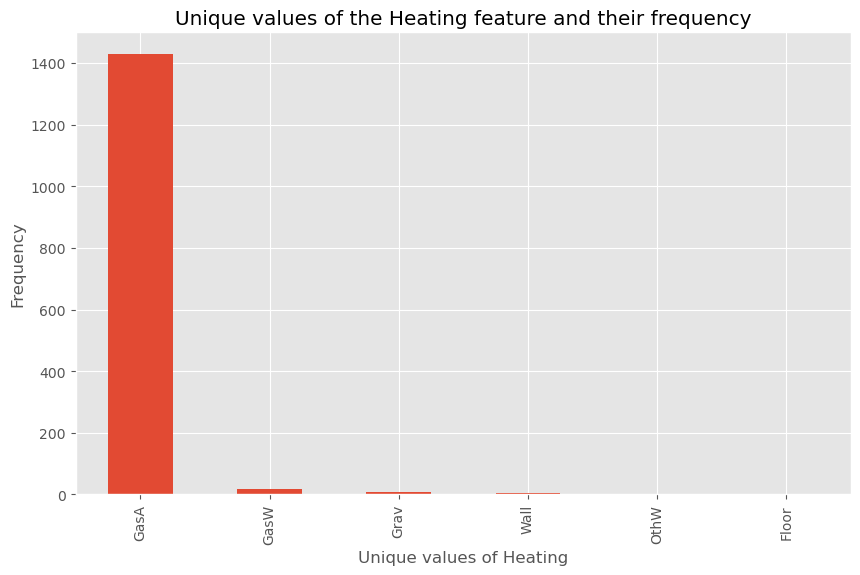

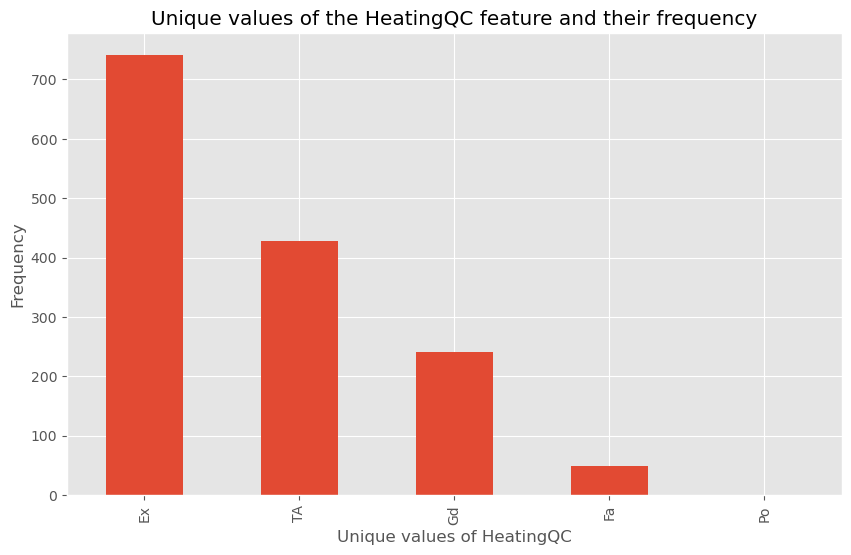

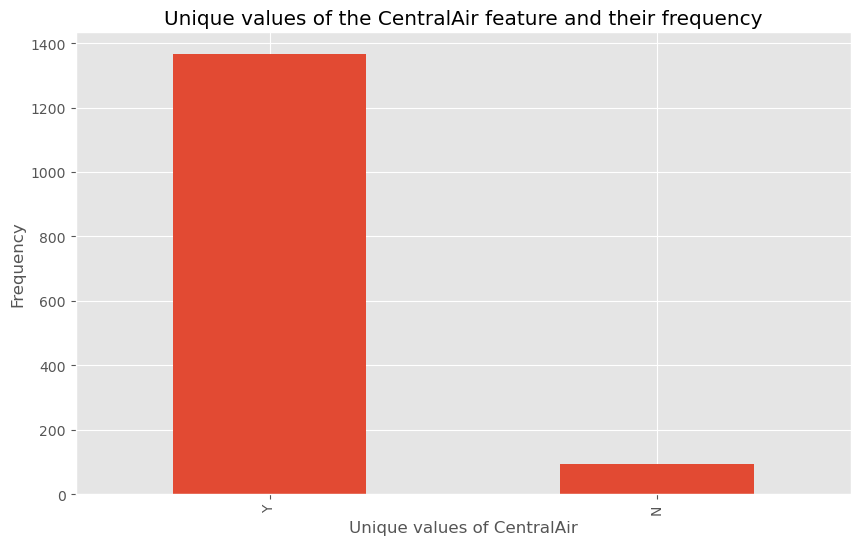

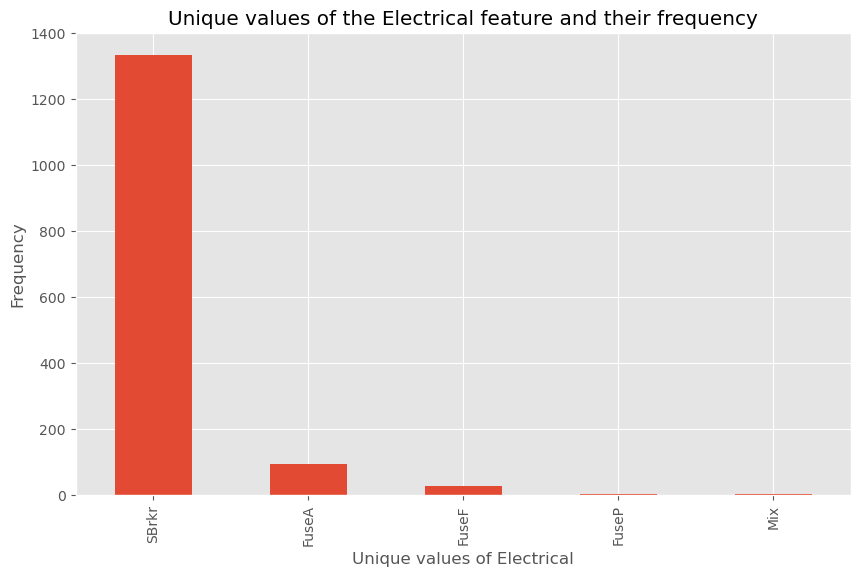

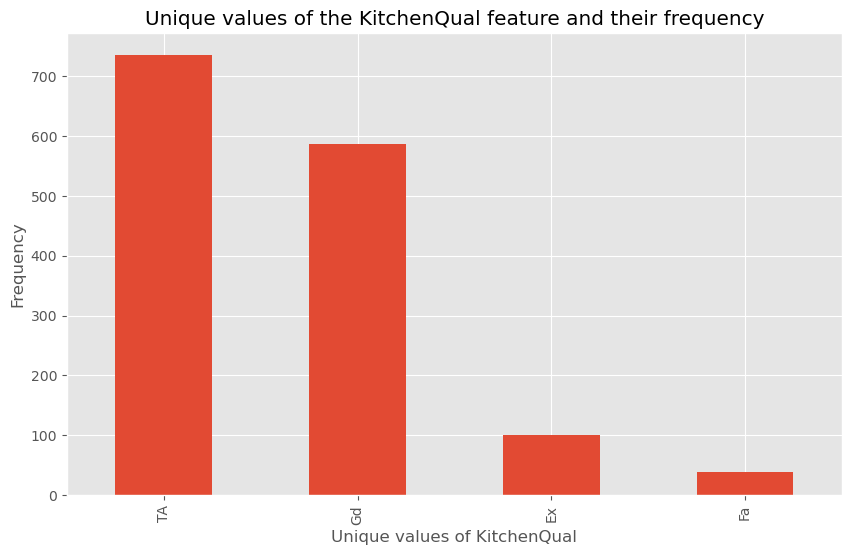

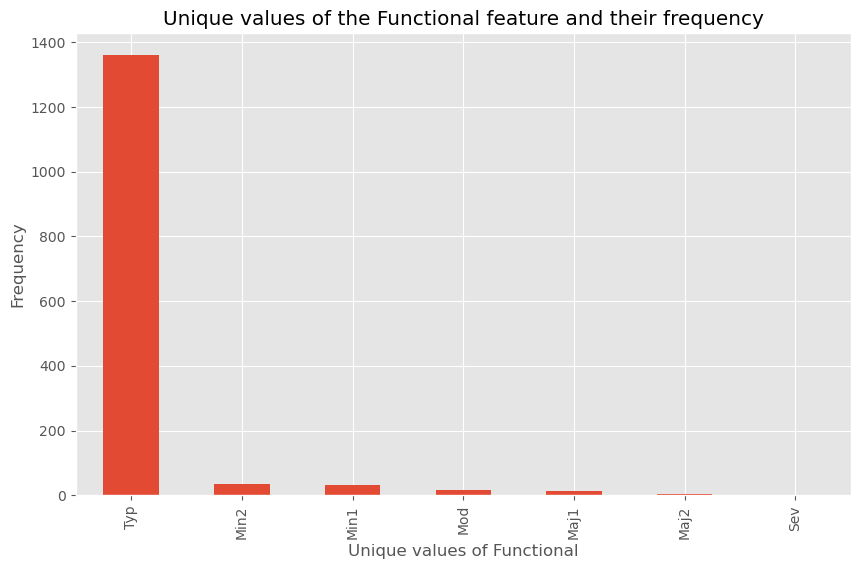

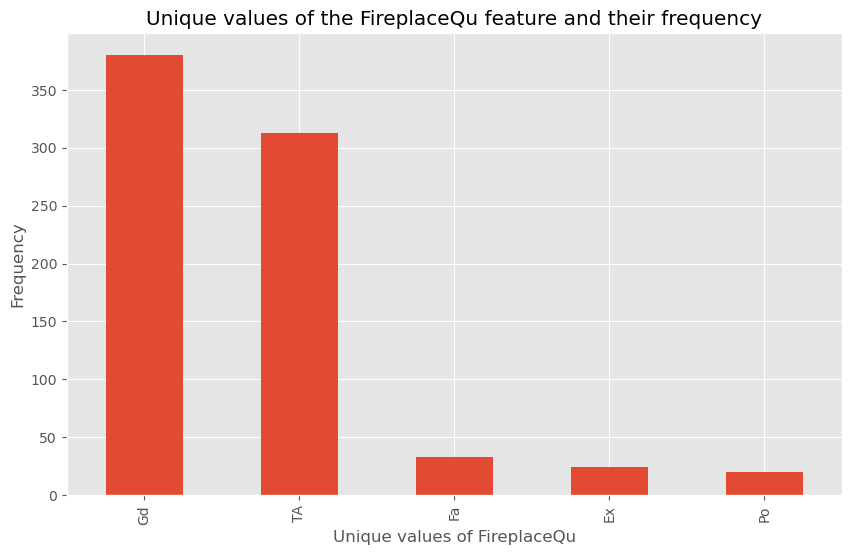

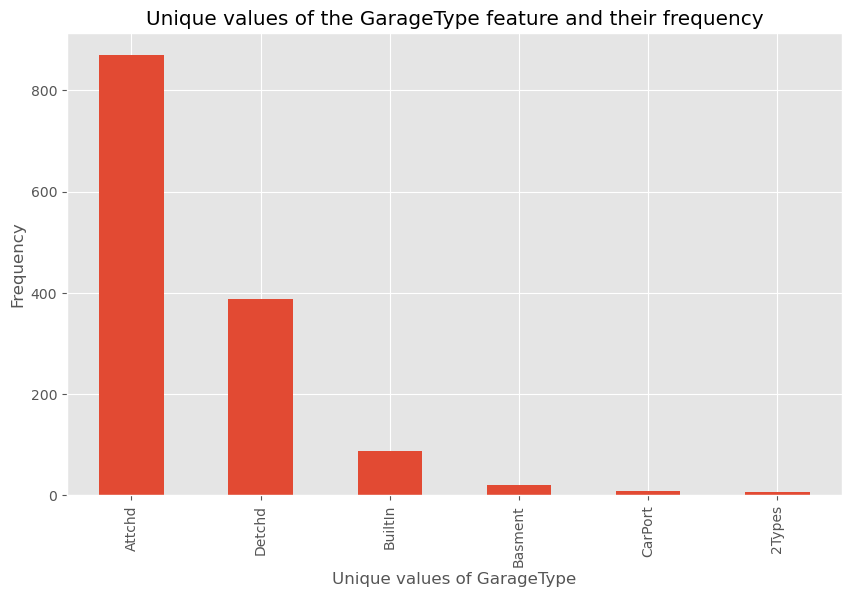

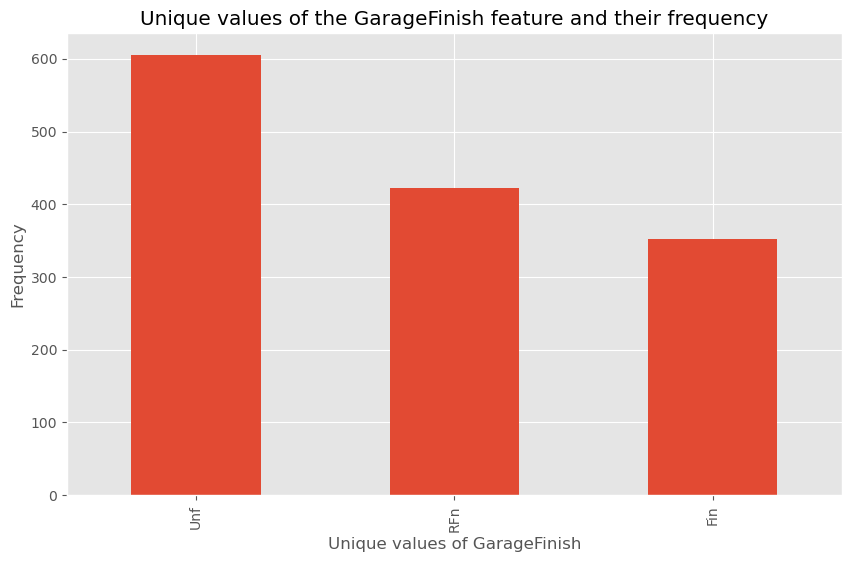

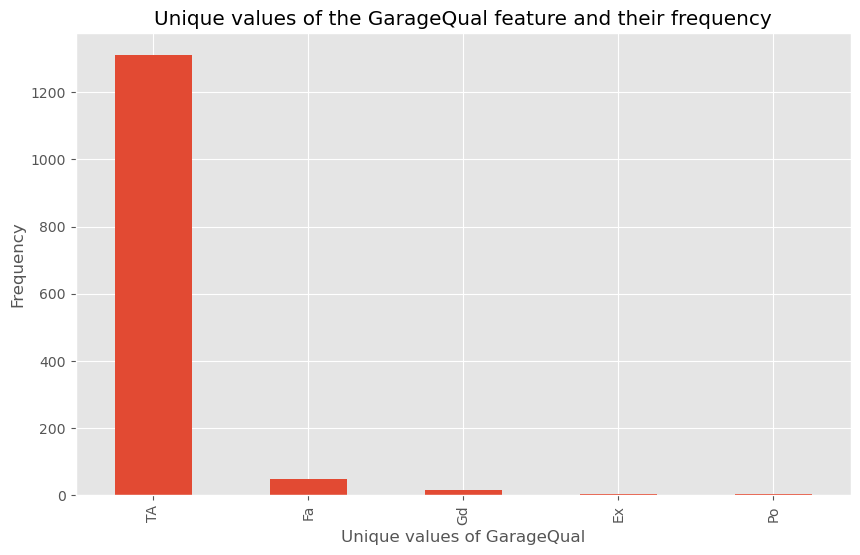

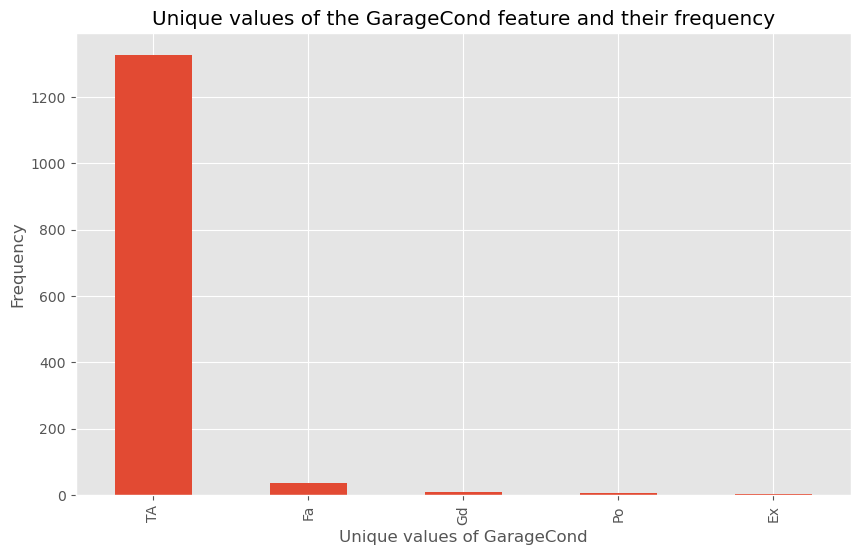

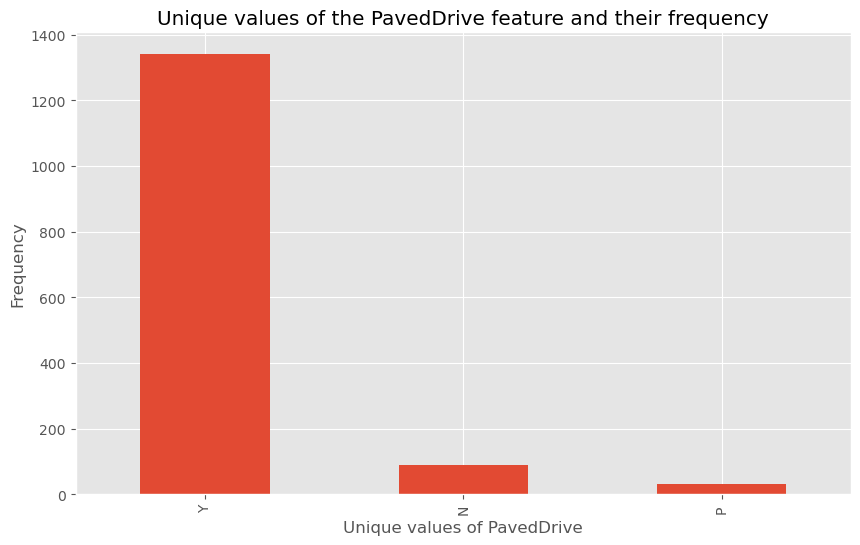

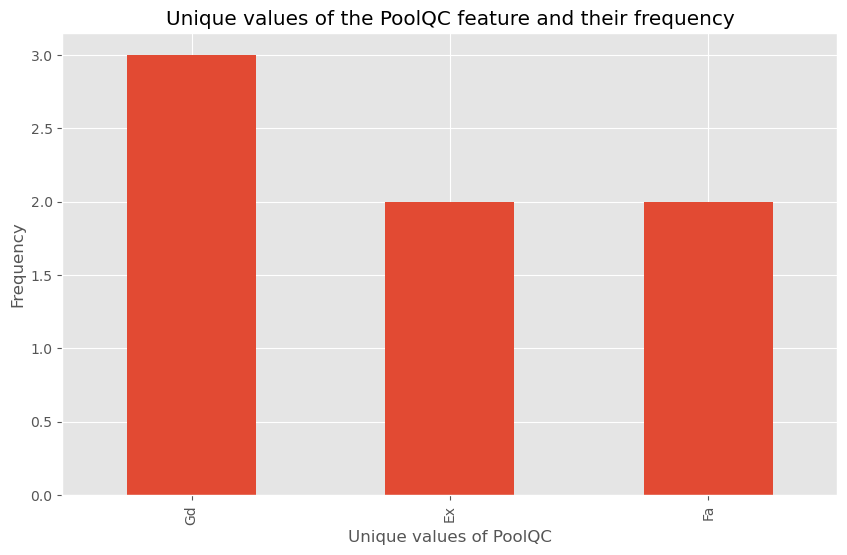

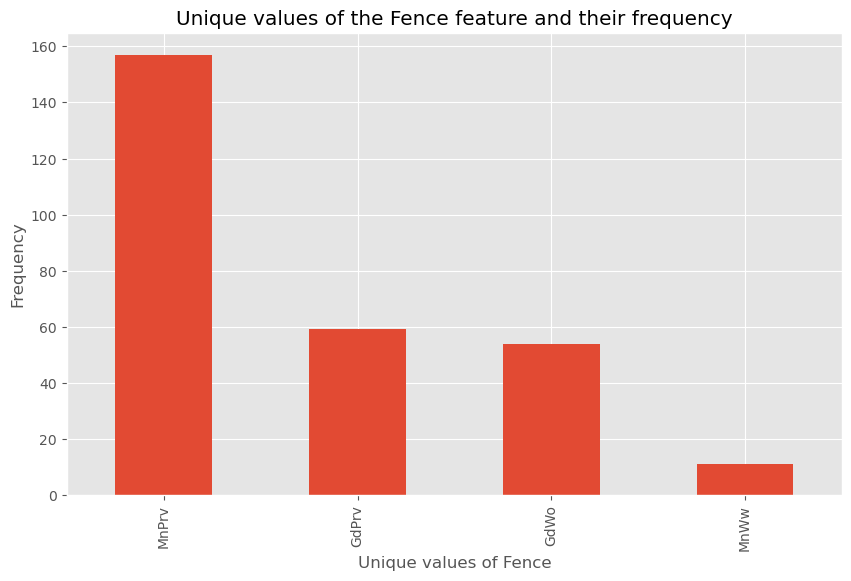

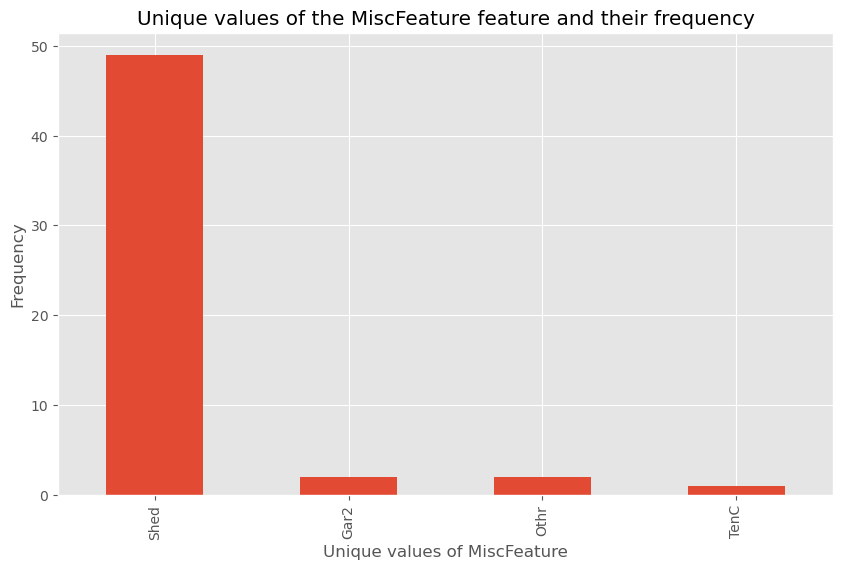

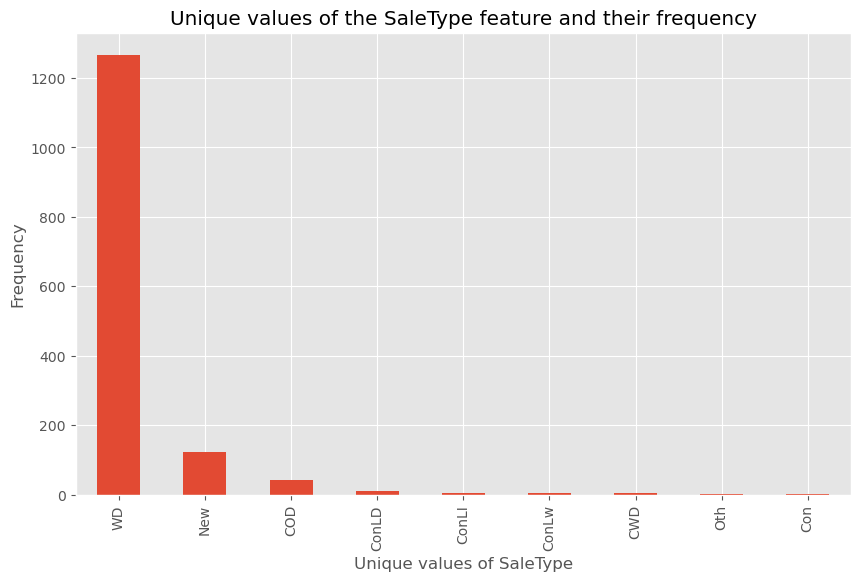

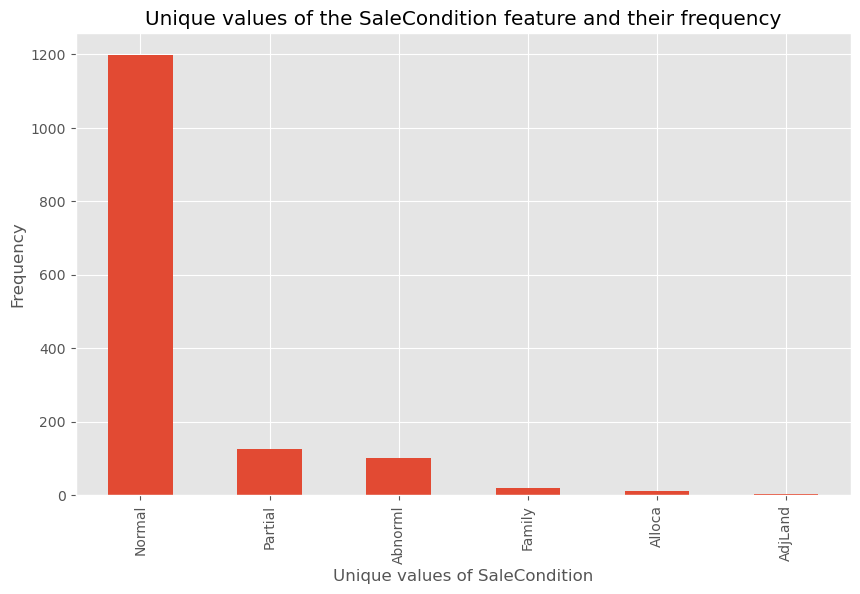

In [56]:
for feature in categorical_cols:
    train[feature].value_counts().plot(kind='bar')
    plt.title(f'Unique values of the {feature} feature and their frequency')
    plt.xlabel(f'Unique values of {feature}')
    plt.ylabel('Frequency')
    plt.show()

#### Observations and Reflections:

1. Alley: The "Alley" variable is populated in just 91 instances, indicating that most houses lack an alley. Interestingly, those with non-null alley entries tend to be relatively inexpensive, peaking around $260k. Moreover, there are three instances with extremely high prices, potentially suggesting outliers in the data.

2. Street: The "Street" feature has two categories, with a mere 6 instances belonging to the "Grvl" class. This suggests that the vast majority of properties have paved access roads.

3. Utilities: The "Utilities" feature comprises two categories, "AllPub" and "NoSeWa." Notably, the latter category appears only once, indicating a scarcity of instances with non-standard utility arrangements.

4. Condition2: This feature exhibits 8 classes, but an overwhelming majority of approximately 1445 out of 1460 instances fall under the "Norm" category, suggesting a significant imbalance in distribution.

5. RoofMatl: Among the 8 classes in the "RoofMatl" feature, around 1434 instances utilize "CompShg" as the material. Other classes have limited representation, indicating a prevalent choice of roofing material.

6. Heating: The "Heating" feature presents 6 classes, with the majority of around 1428 instances employing "GasA" as the heating system. Other heating types are less common.

7. MiscFeature: Similar to "Alley," the "MiscFeature" attribute has only 54 non-null entries. The highest associated price is approximately $270k. This scarcity suggests limited instances of additional features beyond those mentioned.

These insights provide a preliminary understanding of the distribution and characteristics of various categorical variables in the dataset. Further analysis and data preprocessing may be necessary to address potential outliers and ensure accurate modeling and interpretation.

### Handling Missing Values

Next, we check the missing values. In the test dataset there are more features that have a missing value.

In [57]:
train_test = [train, test]

In [58]:
missing_data_dict = {}

for i, df in enumerate(train_test):
    #missing data
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    # Filter rows where Total is at least 1
    missing_data = missing_data[missing_data['Total'] >= 1]

    # Store the missing data DataFrame in a dictionary
    missing_data_dict[f'df_{i+1}'] = missing_data

missing_data_train = missing_data_dict['df_1']
missing_data_test = missing_data_dict['df_2']

# Display the top rows with missing data for each dataframe
print("Missing data in train dataframe:\n")
print(missing_data_train)
print("\nMissing data in test dataframe:\n")
print(missing_data_test)

Missing data in train dataframe:

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685

Missing data in test dataframe:

              Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageFinish     78  0.053461
GarageCond       78  0.053461
Ga

**Note**: From the description of the data, many of the missing values actually represent a class of the feature, in particular NA (not applicable/available), rather than that the data is actually missing.

PoolQC
- To enhance the data quality and streamline our analysis, I will begin by removing the "PoolQC" feature. This decision is substantiated by the fact that over 99.7% of the data points are missing for this feature. Additionally, our initial exploration, including the examination of box plots, did not reveal any discernible pattern or valuable insights associated with "PoolQC."

In [59]:
for df in train_test:
    # Dropping the columns
    df.drop(['PoolQC'], axis=1, inplace = True)

Fence
- Fence feature is missing in about 80% of the data points, meaning that there is no fence rather than the data is simply not there. Let us look at how the existence of fence is related to the OverallQual (which, remember, is a key feature!).

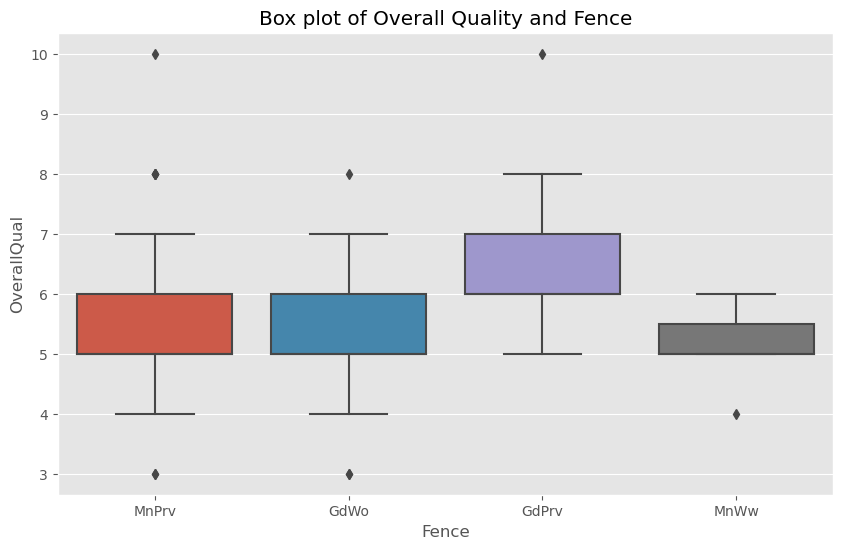

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fence', y='OverallQual', data=train)
plt.title('Box plot of Overall Quality and Fence')
plt.show()

Interestingly, the presence of a fence seems to correlate with a relatively lower overall quality of the house. This observation holds potential value, and thus, we will retain the "Fence" feature in our analysis. To handle the missing values in this feature, we will replace them with "None," effectively representing the absence of a fence.

In [61]:
for df in train_test:
    # Replace 'NaN' values in the 'Fence' column with 'None'
    df['Fence'].fillna('None', inplace=True)

Alley and MiscFeature

- The "MiscFeature" and "Alley" features are among the most frequently missing ones. Our box plot analysis revealed that houses with these features tended to be less expensive. As a result, I will opt to remove both of these features.

In [62]:
for df in train_test:
    # Replace 'NaN' values in the 'Fence' column with 'None'
    df.drop(columns=['Alley', 'MiscFeature'], axis=1, inplace=True)

FireplaceQu

- Approximately half of the data points lack the "FireplaceQu" feature. Referring to the description, this absence corresponds to no fireplace being present. To confirm, we'll cross-check if the count of missing values matches the count of houses with zero fireplaces.

In [63]:
train['FireplaceQu'].isnull().sum() == len(train[train['Fireplaces'] == 0])

True

In [64]:
test['FireplaceQu'].isnull().sum() == len(test[test['Fireplaces'] == 0])

True

In [65]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [66]:
# Therefore I will be replacing the missing values with None

for df in train_test:
    # Replace NaN with 'None'
    df['FireplaceQu'].fillna('None', inplace=True)

**LotFrontage**

The "LotFrontage" feature appears to have missing values that might have a genuine significance, or at the very least, it's unclear what these NaNs might represent. To gain a better understanding, let's delve deeper into this feature and its characteristics through visualization.

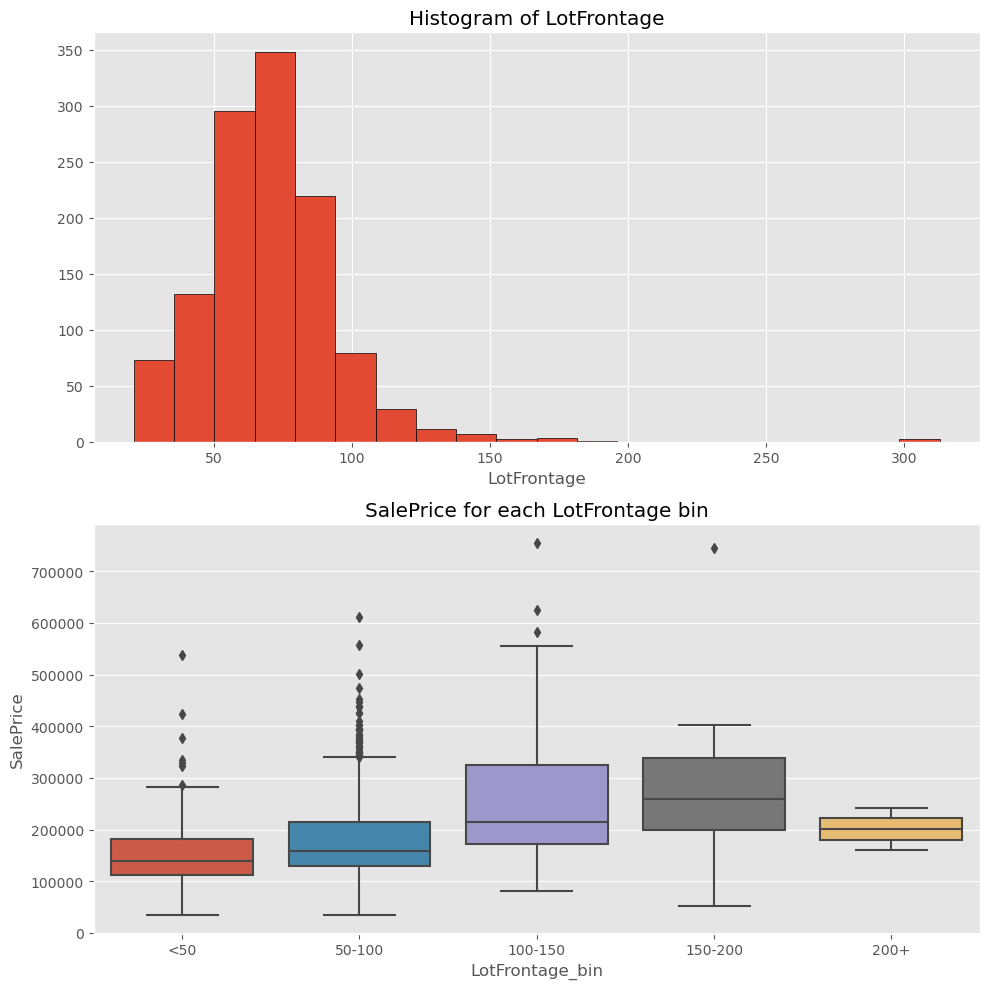

In [67]:
# Define bins and labels
bins = [0, 50, 100, 150, 200, np.inf]
labels = ['<50', '50-100', '100-150', '150-200', '200+']

# Create a new column 'LotFrontage_bin' with bin labels
train['LotFrontage_bin'] = pd.cut(train['LotFrontage'], bins=bins, labels=labels)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot histogram of 'LotFrontage'
ax1.hist(train['LotFrontage'], bins=20, edgecolor='black')
ax1.set_title('Histogram of LotFrontage')
ax1.set_xlabel('LotFrontage')

# Plot boxplot of 'SalePrice' for each 'LotFrontage' bin
sns.boxplot(x='LotFrontage_bin', y='SalePrice', data=train, order=labels, ax=ax2)
ax2.set_title('SalePrice for each LotFrontage bin')

# Adjust layout
plt.tight_layout()
plt.show()

In [68]:
train['LotFrontage_bin'].value_counts()

50-100     912
<50        205
100-150     75
150-200      7
200+         2
Name: LotFrontage_bin, dtype: int64

The distribution of LotFrontage values is centered around the 50-100 range, and there is a notable variability in sale prices within this range. While there is a general upward trend in sale prices as LotFrontage increases, this relationship isn't very strong, as indicated by the correlation heatmap. This is largely due to the limited number of houses with LotFrontage exceeding 150.

Interestingly, LotFrontage doesn't exhibit a strong correlation with any other feature in the dataset. Given the circumstances, a reasonable approach is to replace missing LotFrontage values with the median value. Despite exploring various alternatives, a more sophisticated imputation method hasn't presented itself as superior in this context. Hence, opting for the median provides a pragmatic solution for handling the missing data in this feature.

In [69]:
# Loop over the list and update each dataframe
for dataset in train_test:
    dataset['LotFrontage'].fillna(dataset['LotFrontage'].median(), inplace=True)

In [70]:
garage_features = [feature for feature in train.columns if re.search('Garage', feature) 
                   and feature not in ('GarageCars','GarageArea',)]

In [71]:
garage_features

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [72]:
train[garage_features].isnull().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [73]:
test[garage_features].isnull().sum()

GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
dtype: int64

**Garage Related Features**

GarageType, GarageFinish, GarageQual, GarageYrBlt, and GarageCond: In the training dataset, there are 81 instances where these garage-related features have missing values. As per the data description, the absence of these values signifies the absence of a garage in those houses.

A logical assumption is that the same set of houses lack all four of these garage-related features. To confirm this assumption, we'll conduct a verification process.

In [74]:
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']

# Count the number of missing values for each house
train['TotalGarageMissing'] = train[garage_features].isnull().sum(axis=1)

# Verify if houses with missing garage features have the same count of total missing values
assert train['TotalGarageMissing'].value_counts().index.tolist() == [0, 5]

In [75]:
print(len(train[train['GarageType'].isnull() & train['GarageFinish'].isnull() 
      & train['GarageQual'].isnull() & train['GarageCond'].isnull() & train['GarageYrBlt'].isnull()]), 
      'observations missing the five ' 'abovementioned garage features.')

81 observations missing the five abovementioned garage features.


Among the garage-related features, 'GarageQual' holds particular significance for most individuals, encompassing the overall quality of the garage. Hence, we will retain this feature as it tends to carry the most practical significance. For instances where the data is missing, we will fill in the gaps with the label 'None,' thereby establishing a categorical class indicative of the absence of a garage. This approach ensures that we retain the essential quality-related information while appropriately handling missing values.

In [76]:
for df in train_test:
    # Drop the columns
    df.drop(['GarageType', 'GarageFinish', 'GarageCond'], axis=1, inplace=True)
    
    # Fill missing values in 'GarageQual' with 'None'
    df['GarageQual'].fillna('None', inplace=True)

In [77]:
for df in train_test:
    # Drop the columns
    df.drop(['GarageYrBlt'], axis=1, inplace=True)

**Basement Related Features**

A similar scenario arises in the case of basement-related features: BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, and BsmtFinType1. In line with our approach for garage-related features, we'll adopt a similar strategy for these basement attributes.

In [78]:
basement_features = [feature for feature in train.columns if re.search('Bsmt', feature)
                    and feature not in ('BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                    'BsmtFullBath', 'BsmtFinSF1', 'BsmtHalfBath')]

In [79]:
basement_features

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [80]:
for df in train_test:
    # Drop the columns
    df.drop(['BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1'], axis=1, inplace=True)
    
    # Fill missing values in 'GarageQual' with 'None'
    df['BsmtQual'].fillna('None', inplace=True)

**Masonry**

Similarly, for the categorical feature MasVnrType, a missing value indicates the absence of masonry veneer, so we will replace it with the category 'None'. On the other hand, the feature MasVnrArea is represented as 0 when there is no masonry. Let's confirmed this pattern within the train set.

In [81]:
train['MasVnrType'].isnull().equals(train['MasVnrArea'].isnull())

True

In [82]:
print(len(train[train['MasVnrArea'].isnull() & train['MasVnrType'].isnull()]), 
      'observations missing the two ' 'abovementioned Masonry features.')

8 observations missing the two abovementioned Masonry features.


In [83]:
masvnr_features = [feature for feature in train.columns if re.search('MasVnr', feature)]

In [84]:
masvnr_features

['MasVnrType', 'MasVnrArea']

In [85]:
train[masvnr_features].isnull().sum()

MasVnrType    8
MasVnrArea    8
dtype: int64

In [86]:
test[masvnr_features].isnull().sum()

MasVnrType    16
MasVnrArea    15
dtype: int64

Interestingly, in the test set, there's a single observation with a missing value for MasVnrType but a non-missing and non-zero value for MasVnrArea.

In [87]:
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)  # None means unlimited rows
pd.set_option('display.max_columns', None)

In [88]:
test.loc[(test['MasVnrType'].isnull()) & (test['MasVnrArea'] > 0)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1150  2611          20       RL        124.0    27697   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1150         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1150       Norm     1Fam     1Story            4            3       1961   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1150          1961      Shed  CompShg     Plywood     Plywood        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual  BsmtFinSF1  \
1150       198.0        TA        TA     CBlock       TA       811.0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
1150         0.0      585.0       1396.0    GasA        TA          N   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1150      SBrkr      1608         0             0       1608           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1150           0.0         1         0             3             1   

     KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  GarageCars  \
1150          TA             6        Typ           0        None         1.0   

      GarageArea GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  \
1150       444.0         TA          Y         152           38   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence  MiscVal  MoSold  \
1150              0          0            0         0  None        0      11   

      YrSold SaleType SaleCondition  
1150    2007      COD       Abnorml

In [89]:
test.loc[(test['MasVnrType'].isnull()) & (test['MasVnrArea'] > 0)][masvnr_features]

MasVnrType  MasVnrArea
1150        NaN       198.0

At present, there's ambiguity surrounding whether the inconsistency originates from the MasVnrType or MasVnrArea attributes. In simpler terms, it's uncertain whether there's an actual masonry presence or if the area should indeed be considered as 0 due to its non-existence. Nevertheless, our inclination is towards the likelihood that the inconsistency predominantly relates to MasVnrArea. As a solution, for this specific house, we will adjust the value of MasVnrArea to 0, aligning it with the missing value in the MasVnrType field.

In [90]:
test.loc[((test['MasVnrType'].isnull()) & (test['MasVnrArea'] > 0)), 'MasVnrArea']

1150    198.0
Name: MasVnrArea, dtype: float64

In [91]:
test.loc[((test['MasVnrType'].isnull()) & (test['MasVnrArea'] > 0)), 'MasVnrArea'] = 0

In [92]:
# Verifying the successful implementation of our changes.
test.loc[(test['MasVnrType'].isnull()) & (test['MasVnrArea'] > 0)][masvnr_features]

Empty DataFrame
Columns: [MasVnrType, MasVnrArea]
Index: []

In [93]:
for df in train_test: 
    # Fill missing values in 'MasVnrType' with 'None'
    df['MasVnrType'].fillna('None', inplace=True)
    # Fill missing values in 'MasVnrArea' with 0
    df['MasVnrArea'].fillna(0, inplace=True)

In [94]:
missing_data_dict = {}

for i, df in enumerate(train_test):
    #missing data
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    # Filter rows where Total is at least 1
    missing_data = missing_data[missing_data['Total'] >= 1]

    # Store the missing data DataFrame in a dictionary
    missing_data_dict[f'df_{i+1}'] = missing_data

# Now you can access the missing data for each dataframe:
missing_data_train = missing_data_dict['df_1']
missing_data_test = missing_data_dict['df_2']

# Display the top rows with missing data for each dataframe
print("Missing data in train dataframe:\n")
print(missing_data_train.head(20))
print("\nMissing data in test dataframe:\n")
print(missing_data_test.head(35))

Missing data in train dataframe:

                 Total   Percent
LotFrontage_bin    259  0.177397
Electrical           1  0.000685

Missing data in test dataframe:

              Total   Percent
MSZoning          4  0.002742
Functional        2  0.001371
BsmtFullBath      2  0.001371
BsmtHalfBath      2  0.001371
Utilities         2  0.001371
Exterior1st       1  0.000685
Exterior2nd       1  0.000685
GarageCars        1  0.000685
GarageArea        1  0.000685
KitchenQual       1  0.000685
BsmtFinSF1        1  0.000685
BsmtFinSF2        1  0.000685
BsmtUnfSF         1  0.000685
TotalBsmtSF       1  0.000685
SaleType          1  0.000685


In [95]:
for df in train_test:
    cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
    
print(cols_with_missing)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [96]:
for df in train_test:
    
    # For each column with missing values
    for col in cols_with_missing:
        # Fill missing values with the most common value of houses with the same "OverallQual"
        df[col] = df.groupby('OverallQual')[col].apply(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [97]:
# Let's confirm if all Null Values have been Taking care of
for df in train_test:
    print(df[col].isnull().any())

False
False


## Data Cleaning and Transformation

Let's eliminate the features that had very few data points in more than one class, as mentioned in the observations after the box plots above.

In [98]:
for df in train_test:
    print(df['Condition2'].value_counts())

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64


In [99]:
for df in train_test:
    print(df['Street'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64


In [100]:
for df in train_test:
    print(df['Utilities'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1459
Name: Utilities, dtype: int64


In [101]:
for df in train_test:
    print(df['RoofMatl'].value_counts())

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64


In [102]:
for df in train_test:
    print(df['Heating'].value_counts())

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
GasA    1446
GasW       9
Grav       2
Wall       2
Name: Heating, dtype: int64


In [103]:
for df in train_test:
    # Dropping the columns
    df.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'], axis=1, inplace = True)

In [104]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
0            7            5       2003          2003     Gable     VinylSd   
1            6            8       1976          1976     Gable     MetalSd   
2            7            5       2001          2002     Gable     VinylSd   
3            7            5       1915          1970     Gable     Wd Sdng   
4            8            5       2000          2000     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  \
0         706           0        150          856        Ex          Y   
1         978           0        284         1262        Ex          Y   
2         486           0        434          920        Ex          Y   
3         216           0        540          756        Gd          Y   
4         655           0        490         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu  GarageCars  GarageArea  \
0             8        Typ           0        None           2         548   
1             6        Typ           1          TA           2         460   
2             6        Typ           1          TA           2         608   
3             7        Typ           1          Gd           3         642   
4             9        Typ           1          TA           3         836   

  GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   
3         TA          Y           0           3

In [105]:
train.shape

(1460, 67)

In [106]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'LotFrontage_bin'

In [107]:
train.drop(['TotalGarageMissing'], axis=1, inplace=True)

In [108]:
for df in train_test:
    df.drop(['Id'], axis=1, inplace=True)

In [109]:
train.shape

(1460, 65)

In [110]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'LotFrontage_bin'],
   

In [111]:
train.drop(['LotFrontage_bin'], axis=1, inplace=True)

In [112]:
test.shape

(1459, 63)

In [113]:
train.shape

(1460, 64)

In [114]:
# Let's drop ExterCond feature as the most important feature for the Exter related feature would be ExterQual
for df in train_test:
    df.drop(columns = ['ExterCond'], axis='column', inplace=True)

In [115]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "LotShape" : {"IR3" : 4, "IR2" : 3, "IR1" : 2, "Reg" : 1}
                     })

In [116]:
# Encode some categorical features as ordered numbers when there is information in the order
test = test.replace({
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "LotShape" : {"IR3" : 4, "IR2" : 3, "IR1" : 2, "Reg" : 1}
                     })

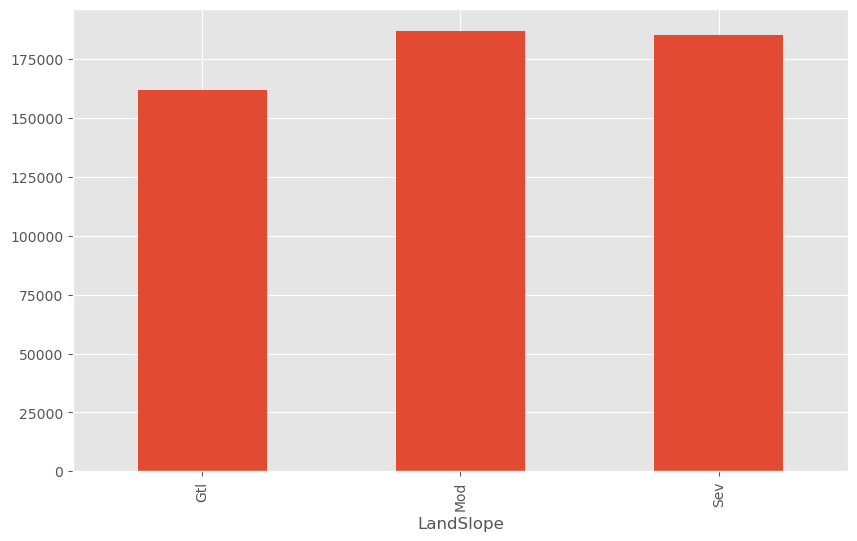

In [117]:
train.groupby('LandSlope')['SalePrice'].median().plot(kind='bar');

We will encode the "LandSlope" feature as follows: Assign a value of 0 to 'Gtl' since it exhibits a lower average sale price. For 'Mod' and 'Sev', we will assign a value of 1. This encoding reflects the varying average sale prices associated with different land slopes.

In [118]:
def encode_landslope(slope):
    if slope == 'Gtl':
        return 0
    else:
        return 1

# Applying the function to the 'LandSlope' column
train['LandSlope'] = train['LandSlope'].apply(encode_landslope)
test['LandSlope'] = test['LandSlope'].apply(encode_landslope)

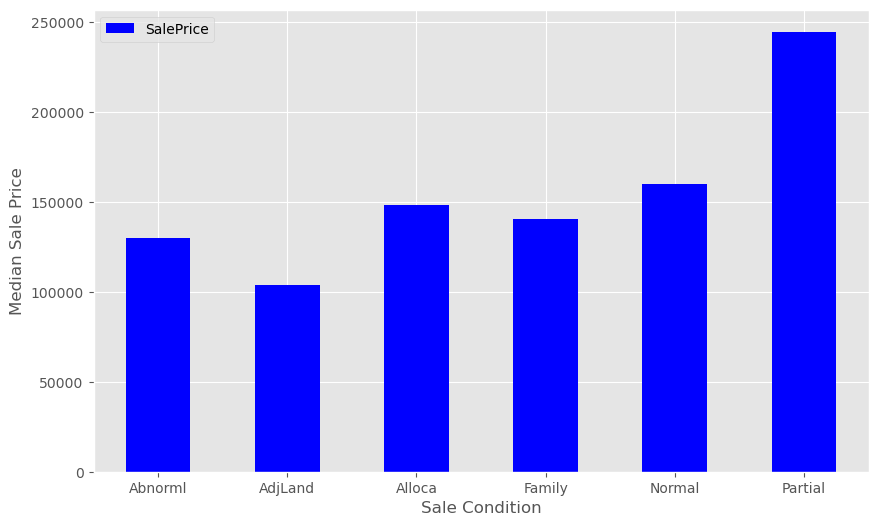

In [119]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

In [120]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['SaleCondition'] = train.SaleCondition.apply(encode)
test['SaleCondition'] = test.SaleCondition.apply(encode)

In [121]:
train.drop(columns=['OverallCond','GarageArea'], axis='column', inplace=True)

In [122]:
test.drop(columns=['OverallCond', 'GarageArea'], axis='column', inplace=True)

In [123]:
train.shape

(1460, 61)

In [124]:
test.shape

(1459, 60)

**Combinations of existing features**: This approach entails generating new features by combining the information from two or more existing features. This technique aims to create a more informative and robust representation of the data by leveraging the relationships between different features. By blending the information from various attributes, we can potentially uncover hidden patterns and enhance the predictive power of our model.

In [125]:
# Creating Age feature by subtracting the Year Built from Year sold
train['Age'] = train['YrSold'] - train['YearBuilt']
test['Age'] = test['YrSold'] - test['YearBuilt']

In [126]:
# Creating a TotalPorchSF feature by combining all related Porch features
train["TotalPorchSF"] = (train["OpenPorchSF"] + train["EnclosedPorch"] + 
                       train["3SsnPorch"] + train["ScreenPorch"])

test["TotalPorchSF"] = (test["OpenPorchSF"] + test["EnclosedPorch"] + 
                       test["3SsnPorch"] + test["ScreenPorch"])

# Creating a TotalBathrooms feature by combining all bath related features
train['TotalBathrooms'] = (train['BsmtFullBath'] + (train['BsmtHalfBath'] * 0.5) + 
                           train['FullBath'] + (train['HalfBath'] * 0.5)
                          )

test['TotalBathrooms'] = (test['BsmtFullBath'] + (test['BsmtHalfBath'] * 0.5) + 
                           test['FullBath'] + (test['HalfBath'] * 0.5)
                          )

In [127]:
# Dropping the Year related column 

train.drop(columns=['YearBuilt', 'YrSold'], axis='column', inplace=True)
test.drop(columns=['YearBuilt', 'YrSold'], axis='column', inplace=True)

In [128]:
# Dropping some of those column used to engineer new features
train.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], 
                     axis='column', inplace=True
          )
test.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], 
                     axis='column', inplace=True
          )

## Feature Selection and Engineering

### Correlation Analysis

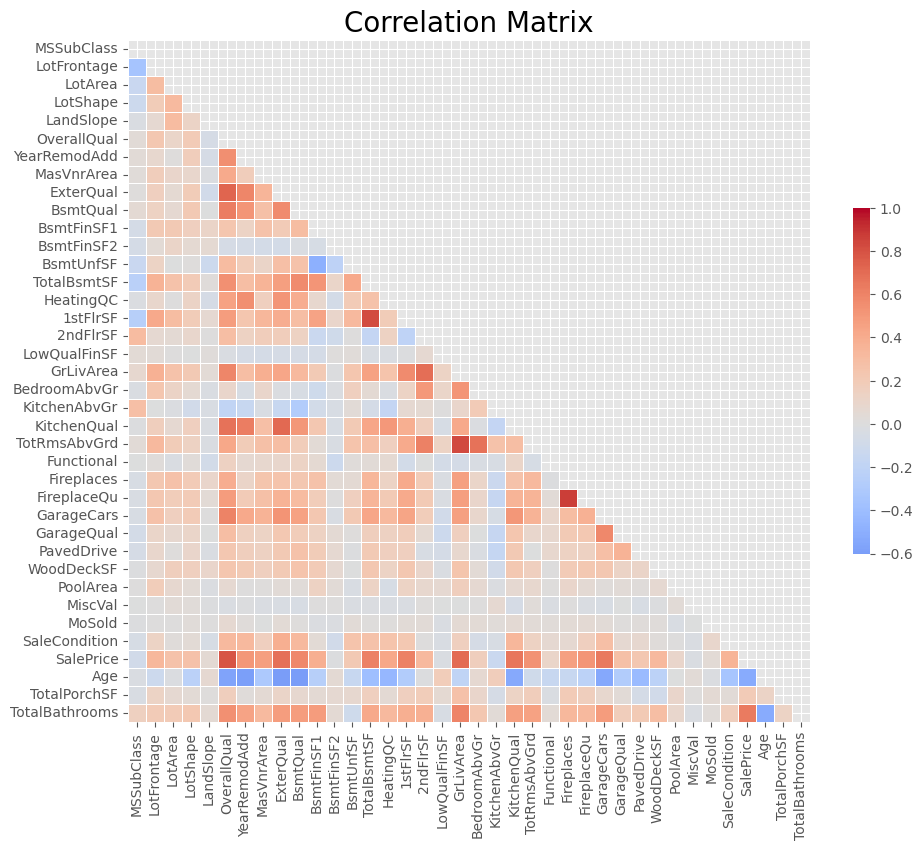

In [129]:
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [130]:
# Compute pairwise correlation of columns, and stack it for easy filtering and sorting
corr = train.corr().stack().reset_index()

# Give names to the correlation DataFrame columns
corr.columns = ['Variable 1', 'Variable 2', 'Correlation Coefficient']

# Sort each pair of variables
corr[['Variable 1', 'Variable 2']] = np.sort(corr[['Variable 1', 'Variable 2']], axis=1)

# Drop duplicate pairs and self-correlations
sorted_corr = corr[corr['Variable 1'] != corr['Variable 2']].drop_duplicates().sort_values(by='Correlation Coefficient', ascending=False)

# Display the top 10 positively cross-correlated feature pairs
print("Top 20 Positively Cross-Correlated Features:\n")
print(sorted_corr.head(20))

Top 20 Positively Cross-Correlated Features:

        Variable 1      Variable 2  Correlation Coefficient
937    FireplaceQu      Fireplaces                 0.863241
706      GrLivArea    TotRmsAbvGrd                 0.825489
509       1stFlrSF     TotalBsmtSF                 0.819530
224    OverallQual       SalePrice                 0.790982
198      ExterQual     OverallQual                 0.726278
325      ExterQual     KitchenQual                 0.716122
718      GrLivArea       SalePrice                 0.708624
626       2ndFlrSF       GrLivArea                 0.687501
338      ExterQual       SalePrice                 0.682639
744   BedroomAbvGr    TotRmsAbvGrd                 0.676620
211    KitchenQual     OverallQual                 0.673331
832    KitchenQual       SalePrice                 0.659600
1022    GarageCars       SalePrice                 0.640409
1329     SalePrice  TotalBathrooms                 0.631731
199       BsmtQual     OverallQual                 0.6

In [131]:
# Compute pairwise correlation of columns
correlation = train.corr()

# Sort correlations with 'target' in descending order and take the first 15
top_corr_features = correlation['SalePrice'].sort_values(ascending=False).head(20)

# Display top 15 positively correlated features
print("Top 20 Positively Correlated Features:\n")
print(top_corr_features)

Top 20 Positively Correlated Features:

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
ExterQual         0.682639
KitchenQual       0.659600
GarageCars        0.640409
TotalBathrooms    0.631731
TotalBsmtSF       0.613581
1stFlrSF          0.605852
BsmtQual          0.585207
TotRmsAbvGrd      0.533723
FireplaceQu       0.520438
YearRemodAdd      0.507101
MasVnrArea        0.472614
Fireplaces        0.466929
HeatingQC         0.427649
BsmtFinSF1        0.386420
SaleCondition     0.352060
LotFrontage       0.334771
WoodDeckSF        0.324413
Name: SalePrice, dtype: float64


### Removing Collinear Features

Identify feature pairs with correlation coefficients exceeding 0.7 or 0.8. Remove them, considering their correlation with the dependent feature. Strong correlations imply robust linear relationships between variables.

In [132]:
train.drop(['TotRmsAbvGrd', '1stFlrSF', 'Fireplaces', 'ExterQual'], axis=1, inplace = True)

In [133]:
test.drop(['TotRmsAbvGrd', '1stFlrSF', 'Fireplaces', 'ExterQual'], axis=1, inplace = True)

**Preparing Data for Training**

To convert categorical variables into dummy variables, we will employ the get_dummies method. Afterward, it's essential to align both datasets. This alignment becomes necessary as generating dummies might lead to one dataset having more features than the other. This discrepancy could arise if a feature in either dataset contains a class that is absent in the other set. Ensuring alignment guarantees consistency across the datasets.

In [134]:
# Convert categorical variable into dummy/indicator variables
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [135]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Align the training and testing data, keep only columns present in both dataframes
X, test = X.align(test, join='inner', axis=1)

## Model Selection and Building

We will use a basic CatBoost model for this task with cross validation, which in fact performs quite well without even any hyperparameter tuning.

In [136]:
# Identify categorical features
categorical_features_indices = np.where(train.dtypes == 'object')[0]

# Define CatBoost model
model = CatBoostRegressor(loss_function='RMSE', verbose = 0)

# Train CatBoost model
model.fit(X, y, cat_features=categorical_features_indices, verbose = False)

# Evaluate model with CV
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -scores
print("Average RMSE: ", rmse_scores.mean())

Average RMSE:  25528.338568957428


## Unveiling Key Predictors: A Look at Feature Importance

Let us see which features actually have the most impact on the sale price, at least according to our model.

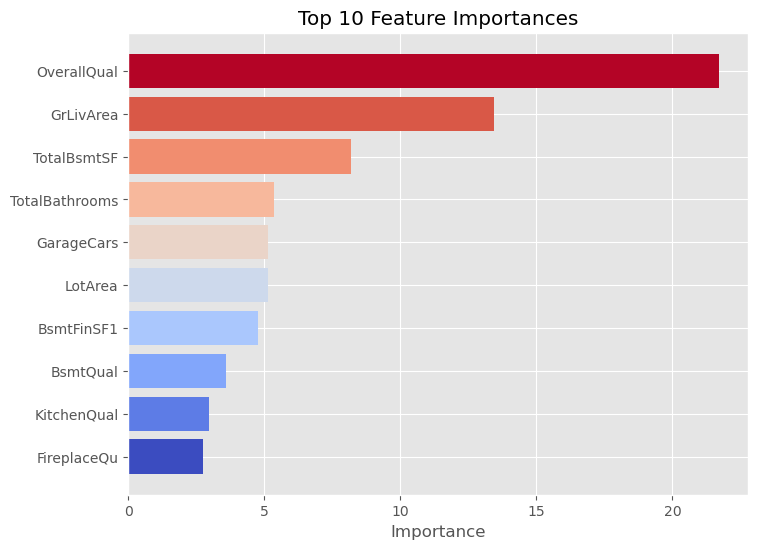

In [137]:
# Get feature importance
feature_importances = model.get_feature_importance()

# Create a DataFrame to store the feature importances and names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Select the top 10 most important features
top_10 = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Sort the top 10 features by importance (for better visualization)
top_10.sort_values(by='Importance', ascending=True, inplace=True)

# Use a colormap to get an array of colors
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, 10))

# Plot
plt.figure(figsize=(8, 6))
plt.barh(top_10['Feature'], top_10['Importance'], color=colors)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

## Predict and Submit

In [138]:
predictions = model.predict(test)

In [139]:
# Ensure the predictions are in the same format as the submission expects
predictions = pd.Series(predictions)

# Replace the 'SalePrice' column with our predictions
submission['SalePrice'] = predictions

# Write the submission dataframe to a new CSV file
submission.to_csv('submission.csv', index=False)

In [140]:
pd.read_csv('submission.csv').head()

Id      SalePrice
0  1461  117776.568864
1  1462  164032.397327
2  1463  181223.957355
3  1464  188017.596286
4  1465  176973.656046

some that come to mind include applying transformations to some of the features to make them more normally distributed, normalising numeric variables, label encoding certain categorical variables which had natural ordering, dropping one feature after get_dummies to avoid multicollinearity and dealing with outliers. In any case, best of luck with experimenting!